# Chemistry versus characteristics

In [41]:
#import statements
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#loading in data
info1=pd.read_csv('/Users/annadignan/ursi2022/sources_info1.csv')
info1=pd.DataFrame(info1)

info2=pd.read_csv('/Users/annadignan/ursi2022/sources_info2.csv',skipfooter=8)
info2=pd.DataFrame(info2)

#merge two dataframes into one
info_master=pd.merge(info1,info2,on='Star',how='outer')

info_master = info_master.loc[(info_master['Existing_Spitzer_data'] != 'No')& (info_master['Existing_Spitzer_data'] != 'No?') & (info_master['Existing_Spitzer_data'] != 'Unsure')]

#pulling in columns I want (name, star system, disk characteristics, molecular info)
info_master = pd.DataFrame(info_master, columns= ['Star','Disk_has_Rings','Disk_has_spirals','Disk_Asymmetry',
                                     'Star_system','Spectral_Type',
                                     'OH_23_2_microns','OH_23_2_microns_uncertainty','OH_27_6_microns','OH_27_6_microns_uncertainty',
                                     'HCN_flux','HCN_flux_uncertainty',
                                     'C2H2_flux','C2H2_flux_uncertainty',
                                     'H2O_15_17_microns','H2O_15_17_uncertainty',
                                     'H2O_17_22_microns','H2O_17_22_uncertainty',
                                     'H2O_29_85_microns','H2O_29_85_uncertainty',
                                     'CO2_flux','CO2_flux_uncertainty',
                                    'NeII_12_8_flux','NeII_12_8_flux_uncertainty'
                                    ])



<ipython-input-41-36535f9233ed>:10: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  info2=pd.read_csv('/Users/annadignan/ursi2022/sources_info2.csv',skipfooter=8)


## Making a dataframe where uncertainty == -99 means it's a non-detection (no good!)

In [42]:
###water
# Here, suppress -99 fluxes, where spectra is not available:
water = info_master.loc[(info_master['H2O_15_17_microns'] != -99)]

# State that "uncertainty does not = -99" indicates a "TRUE" detection:
mybool_water = ((water.H2O_15_17_uncertainty != -99) | (water.H2O_17_22_uncertainty != -99) | (water.H2O_29_85_uncertainty != -99))

###oh
# Here, suppress -99 fluxes, where spectra is not available:
oh = info_master.loc[(info_master['OH_23_2_microns'] != -99) | (info_master['OH_27_6_microns'] != -99) ]

# State that "uncertainty does not = -99" indicates a "TRUE" detection:
mybool_oh = ((oh.OH_23_2_microns_uncertainty != -99) | (oh.OH_27_6_microns_uncertainty != -99))

oh = oh[mybool_oh]

##hcn
# Here, suppress -99 fluxes, where spectra is not available:
hcn = info_master.loc[(info_master['HCN_flux'] != -99)]

# State that "uncertainty does not = -99" indicates a "TRUE" detection:
mybool_hcn = (hcn.HCN_flux_uncertainty != -99)

hcn = hcn[mybool_hcn]

###c2h2
# Here, suppress -99 fluxes, where spectra is not available:
c2h2 = info_master.loc[info_master['C2H2_flux'] != -99]

# State that "uncertainty does not = -99" indicates a "TRUE" detection:
mybool_c2h2 = (c2h2.C2H2_flux_uncertainty != -99)

c2h2 = c2h2[mybool_c2h2]

###co2
# Here, suppress -99 fluxes, where spectra is not available:
co2 = info_master.loc[info_master['CO2_flux'] != -99]

# State that "uncertainty does not = -99" indicates a "TRUE" detection:
mybool_co2 = (co2.CO2_flux_uncertainty != -99)

co2 = co2[mybool_co2]

###neii
# Here, suppress -99 fluxes, where spectra is not available:
neii = info_master.loc[info_master['NeII_12_8_flux'] != -99]

# State that "uncertainty does not = -99" indicates a "TRUE" detection:
mybool_neii = (neii.NeII_12_8_flux_uncertainty != -99)

neii = neii[mybool_neii]
#neii


7


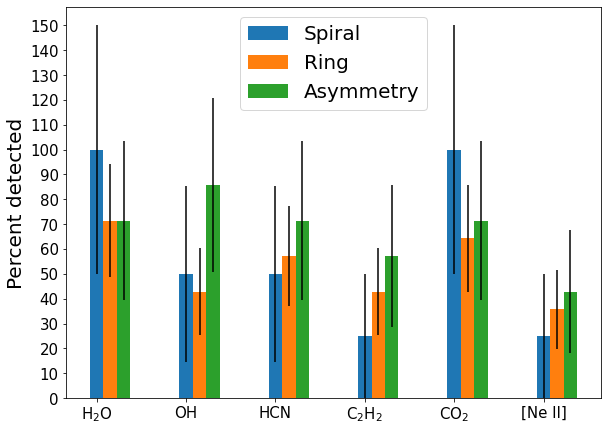

In [43]:
#stacked bar chart

#import statement
from matplotlib import ticker

#create blank figure
plt.figure(figsize=(9.6,7.2))

#spiral data
spiral1= len(water[water['Disk_has_spirals'] == 'TRUE']) / (len(info_master[info_master['Disk_has_spirals'] == 'TRUE']))
spiral2= len(oh[oh['Disk_has_spirals'] == 'TRUE']) / (len(info_master[info_master['Disk_has_spirals'] == 'TRUE']))
spiral3= len(hcn[hcn['Disk_has_spirals'] == 'TRUE']) / (len(info_master[info_master['Disk_has_spirals'] == 'TRUE']))
spiral4= len(c2h2[c2h2['Disk_has_spirals'] == 'TRUE']) / (len(info_master[info_master['Disk_has_spirals'] == 'TRUE']))
spiral5= len(co2[co2['Disk_has_spirals'] == 'TRUE']) / (len(info_master[info_master['Disk_has_spirals'] == 'TRUE']))
spiral6= len(neii[neii['Disk_has_spirals'] == 'TRUE']) / (len(info_master[info_master['Disk_has_spirals'] == 'TRUE']))

#error bars for spiral data
spiralerr1= np.sqrt(spiral1/(len(info_master[info_master['Disk_has_spirals'] == 'TRUE'])))
spiralerr2= np.sqrt(spiral2/(len(info_master[info_master['Disk_has_spirals'] == 'TRUE'])))
spiralerr3= np.sqrt(spiral3/(len(info_master[info_master['Disk_has_spirals'] == 'TRUE'])))
spiralerr4= np.sqrt(spiral4/(len(info_master[info_master['Disk_has_spirals'] == 'TRUE'])))
spiralerr5= np.sqrt(spiral5/(len(info_master[info_master['Disk_has_spirals'] == 'TRUE'])))
spiralerr6= np.sqrt(spiral6/(len(info_master[info_master['Disk_has_spirals'] == 'TRUE'])))

spiral = 100*np.array((spiral1,spiral2,spiral3,spiral4,spiral5,spiral6))
spiralerr = 100*np.array((spiralerr1,spiralerr2,spiralerr3,spiralerr4,spiralerr5,spiralerr6))

#ring data
ring1= len(water[water['Disk_has_Rings'] == 'TRUE']) / (len(info_master[info_master['Disk_has_Rings'] == 'TRUE']))
ring2= len(oh[oh['Disk_has_Rings'] == 'TRUE']) / (len(info_master[info_master['Disk_has_Rings'] == 'TRUE']))
ring3= len(hcn[hcn['Disk_has_Rings'] == 'TRUE']) / (len(info_master[info_master['Disk_has_Rings'] == 'TRUE']))
ring4= len(c2h2[c2h2['Disk_has_Rings'] == 'TRUE']) / (len(info_master[info_master['Disk_has_Rings'] == 'TRUE']))
ring5= len(co2[co2['Disk_has_Rings'] == 'TRUE']) / (len(info_master[info_master['Disk_has_Rings'] == 'TRUE']))
ring6= len(neii[neii['Disk_has_Rings'] == 'TRUE']) / (len(info_master[info_master['Disk_has_Rings'] == 'TRUE']))
                    
#error bars for ring data
ringerr1= np.sqrt(ring1/(len(info_master[info_master['Disk_has_Rings'] == 'TRUE'])))
ringerr2= np.sqrt(ring2/(len(info_master[info_master['Disk_has_Rings'] == 'TRUE'])))
ringerr3= np.sqrt(ring3/(len(info_master[info_master['Disk_has_Rings'] == 'TRUE'])))
ringerr4= np.sqrt(ring4/(len(info_master[info_master['Disk_has_Rings'] == 'TRUE'])))
ringerr5= np.sqrt(ring5/(len(info_master[info_master['Disk_has_Rings'] == 'TRUE'])))
ringerr6= np.sqrt(ring6/(len(info_master[info_master['Disk_has_Rings'] == 'TRUE'])))

ring = 100*np.array((ring1,ring2,ring3,ring4,ring5,ring6))
ringerr= 100*np.array((ringerr1,ringerr2,ringerr3,ringerr4,ringerr5,ringerr6))
        
#asymmetry data
asym1= len(water[water['Disk_Asymmetry'] == 'TRUE']) / (len(info_master[info_master['Disk_Asymmetry'] == 'TRUE']))
asym2= len(oh[oh['Disk_Asymmetry'] == 'TRUE']) / (len(info_master[info_master['Disk_Asymmetry'] == 'TRUE']))
asym3= len(hcn[hcn['Disk_Asymmetry'] == 'TRUE']) / (len(info_master[info_master['Disk_Asymmetry'] == 'TRUE']))
asym4= len(c2h2[c2h2['Disk_Asymmetry'] == 'TRUE']) / (len(info_master[info_master['Disk_Asymmetry'] == 'TRUE']))
asym5= len(co2[co2['Disk_Asymmetry'] == 'TRUE']) / (len(info_master[info_master['Disk_Asymmetry'] == 'TRUE']))
asym6= len(neii[neii['Disk_Asymmetry'] == 'TRUE']) / (len(info_master[info_master['Disk_Asymmetry'] == 'TRUE']))
                  
#error bars for asymmetry data
asymerr1= np.sqrt(asym1/(len(info_master[info_master['Disk_Asymmetry'] == 'TRUE'])))
asymerr2= np.sqrt(asym2/(len(info_master[info_master['Disk_Asymmetry'] == 'TRUE'])))
asymerr3= np.sqrt(asym3/(len(info_master[info_master['Disk_Asymmetry'] == 'TRUE'])))
asymerr4= np.sqrt(asym4/(len(info_master[info_master['Disk_Asymmetry'] == 'TRUE'])))
asymerr5= np.sqrt(asym5/(len(info_master[info_master['Disk_Asymmetry'] == 'TRUE'])))
asymerr6= np.sqrt(asym6/(len(info_master[info_master['Disk_Asymmetry'] == 'TRUE'])))

asym = 100*np.array((asym1,asym2,asym3,asym4,asym5,asym6))
print((len(info_master[info_master['Disk_Asymmetry'] == 'TRUE'])))
asymerr= 100*np.array((asymerr1,asymerr2,asymerr3,asymerr4,asymerr5,asymerr6))
                  
ind = np.arange(6)
width = 0.15 #leave width for now      

p1 = plt.bar(ind, spiral, width, yerr=spiralerr) 
p2 = plt.bar(ind+width, ring, width, yerr=ringerr)
p3 = plt.bar(ind+width*2, asym, width, yerr=asymerr)

plt.ylabel('Percent detected',fontsize=20)
plt.xticks(ind, (r'H$_2$O', 'OH', 'HCN', r'C$_2$H$_2$', r'CO$_2$', '[Ne II]'),fontsize=15) #replace tick marks to reflect six molecules
plt.yticks(np.arange(0, 160, 10),fontsize=15)
plt.legend((p1[0], p2[0], p3[0]), ('Spiral', 'Ring', 'Asymmetry'),fontsize=20,loc='upper center')

plt.show()

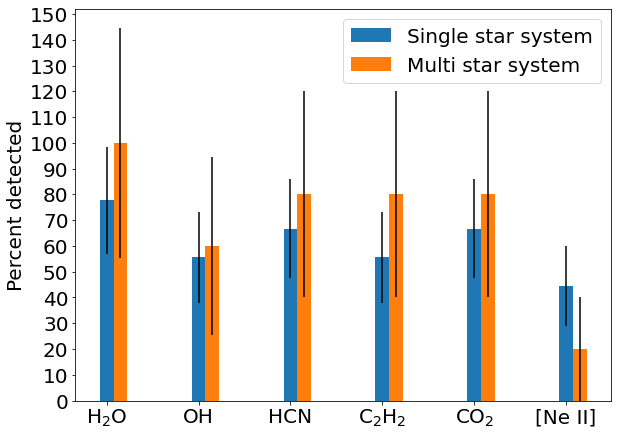

In [44]:
#stacked bar chart part two

#import statement
from matplotlib import ticker

#create blank figure
plt.figure(figsize=(9.6,7.2))

#single star system data
single1= len(water[water['Star_system'] == 'Single']) / (len(info_master[info_master['Star_system'] == 'Single']))
single2= len(oh[oh['Star_system'] == 'Single']) / (len(info_master[info_master['Star_system'] == 'Single']))
single3= len(hcn[hcn['Star_system'] == 'Single']) / (len(info_master[info_master['Star_system'] == 'Single']))
single4= len(c2h2[c2h2['Star_system'] == 'Single']) / (len(info_master[info_master['Star_system'] == 'Single']))
single5= len(co2[co2['Star_system'] == 'Single']) / (len(info_master[info_master['Star_system'] == 'Single']))
single6= len(neii[neii['Star_system'] == 'Single']) / (len(info_master[info_master['Star_system'] == 'Single']))

#error bars for single data
singleerr1=np.sqrt(single1/(len(info_master[info_master['Star_system'] == 'Single'])))
singleerr2=np.sqrt(single2/(len(info_master[info_master['Star_system'] == 'Single'])))
singleerr3=np.sqrt(single3/(len(info_master[info_master['Star_system'] == 'Single'])))
singleerr4=np.sqrt(single4/(len(info_master[info_master['Star_system'] == 'Single'])))
singleerr5=np.sqrt(single5/(len(info_master[info_master['Star_system'] == 'Single'])))
singleerr6=np.sqrt(single6/(len(info_master[info_master['Star_system'] == 'Single'])))

single = 100*np.array((single1,single2,single3,single4,single5,single6))
singleerr= 100*np.array((singleerr1,singleerr2,singleerr3,singleerr4,singleerr5,singleerr6))

#multi star system data
multi1= len(water[water['Star_system'] != 'Single']) / (len(info_master[info_master['Star_system'] != 'Single']))
multi2= len(oh[oh['Star_system'] != 'Single']) / (len(info_master[info_master['Star_system'] != 'Single']))
multi3= len(hcn[hcn['Star_system'] != 'Single']) / (len(info_master[info_master['Star_system'] != 'Single']))
multi4= len(c2h2[c2h2['Star_system'] != 'Single']) / (len(info_master[info_master['Star_system'] != 'Single']))
multi5= len(co2[co2['Star_system'] != 'Single']) / (len(info_master[info_master['Star_system'] != 'Single']))
multi6= len(neii[neii['Star_system'] != 'Single']) / (len(info_master[info_master['Star_system'] != 'Single']))

#error bars for multi data
multierr1=np.sqrt(multi1/(len(info_master[info_master['Star_system'] != 'Single'])))
multierr2=np.sqrt(multi2/(len(info_master[info_master['Star_system'] != 'Single'])))
multierr3=np.sqrt(multi3/(len(info_master[info_master['Star_system'] != 'Single'])))
multierr4=np.sqrt(multi4/(len(info_master[info_master['Star_system'] != 'Single'])))
multierr5=np.sqrt(multi5/(len(info_master[info_master['Star_system'] != 'Single'])))
multierr6=np.sqrt(multi6/(len(info_master[info_master['Star_system'] != 'Single'])))

multi = 100*np.array((multi1,multi2,multi3,multi4,multi5,multi6))
multierr= 100*np.array((multierr1,multierr2,multierr3,multierr4,multierr5,multierr6))

ind = np.arange(6)
width = 0.15 #leave width for now      

p1 = plt.bar(ind, single, width,yerr=singleerr) 
p2 = plt.bar(ind+width, multi, width,yerr=multierr)

plt.ylabel('Percent detected',fontsize=20)
plt.xticks(ind, (r'H$_2$O', 'OH', 'HCN', r'C$_2$H$_2$', r'CO$_2$', '[Ne II]'),fontsize=20) #replace tick marks to reflect six molecules
plt.yticks(np.arange(0, 160, 10),fontsize=20)
plt.legend((p1[0], p2[0]), ('Single star system', 'Multi star system'),fontsize=20)

plt.show()

## Rings

In [2]:
info_chars=info_master[['Star','Disk_has_Rings','Annular_Substructures','Disk_has_spirals','Disk_Asymmetry',
                       'Transition_Disk','Star_system']]

fraction = 100 * (info_chars['Disk_has_Rings'].value_counts().TRUE) / (info_chars['Star'].count())
fraction_round=round(fraction,1)

print('Out of ' + str(info_chars['Star'].count()) + ' sources, ' + 
      str(info_chars['Disk_has_Rings'].value_counts().TRUE) + ' have rings, which is ' 
     + str(fraction_round) + '% of the sample')

Out of 31 sources, 22 have rings, which is 71.0% of the sample


## Annular substructure

In [3]:
fraction = 100 * (info_chars['Annular_Substructures'].value_counts().TRUE) / (info_chars['Star'].count())
fraction_round=round(fraction,1)

print('Out of ' + str(info_chars['Star'].count()) + ' sources, ' + 
      str(info_chars['Annular_Substructures'].value_counts().TRUE) + ' have annular substructure, which is ' 
     + str(fraction_round) + '% of the sample')

Out of 31 sources, 23 have annular substructure, which is 74.2% of the sample


## Spirals

In [4]:
fraction = 100 * (info_chars['Disk_has_spirals'].value_counts().TRUE) / (info_chars['Star'].count())
fraction_round=round(fraction,1)

print('Out of ' + str(info_chars['Star'].count()) + ' sources, ' + 
      str(info_chars['Disk_has_spirals'].value_counts().TRUE) + ' have spirals, which is ' 
     + str(fraction_round) + '% of the sample')

Out of 31 sources, 5 have spirals, which is 16.1% of the sample


## Asymmetry

In [5]:
fraction = 100 * (info_chars['Disk_Asymmetry'].value_counts().TRUE) / (info_chars['Star'].count())
fraction_round=round(fraction,1)

print('Out of ' + str(info_chars['Star'].count()) + ' sources, ' + 
      str(info_chars['Disk_Asymmetry'].value_counts().TRUE) + ' have confirmed asymmetry, which is ' 
     + str(fraction_round) + '% of the sample')

Out of 31 sources, 10 have confirmed asymmetry, which is 32.3% of the sample


## Transition

In [6]:
fraction = 100 * (info_chars['Transition_Disk'].value_counts().TRUE) / (info_chars['Star'].count())
fraction_round=round(fraction,1)

print('Out of ' + str(info_chars['Star'].count()) + ' sources, ' + 
      str(info_chars['Transition_Disk'].value_counts().TRUE) + ' are classified as having a transition disk, which is ' 
     + str(fraction_round) + '% of the sample')

Out of 31 sources, 2 are classified as having a transition disk, which is 6.5% of the sample


## Star system

In [7]:
fraction_single = 100 * (info_chars['Star_system'].value_counts().Single) / (info_chars['Star'].count())
fraction_single_round=round(fraction_single,1)

fraction_binary = 100 * (info_chars['Star_system'].value_counts().Binary) / (info_chars['Star'].count())
fraction_binary_round=round(fraction_binary,1)

fraction_triple = 100 * (info_chars['Star_system'].value_counts().Triple) / (info_chars['Star'].count())
fraction_triple_round=round(fraction_triple,1)

fraction_nan = 100 * (info_chars['Star_system'].isna().sum()) / (info_chars['Star'].count())
fraction_nan_round=round(fraction_nan,1)

print('Out of ' + str(info_chars['Star'].count()) + ' sources, ' + 
      str(info_chars['Star_system'].value_counts().Single) + ' are single systems, which is ' 
     + str(fraction_single_round) + '% of the sample')

print('Out of ' + str(info_chars['Star'].count()) + ' sources, ' + 
      str(info_chars['Star_system'].value_counts().Binary) + ' are binary systems, which is ' 
     + str(fraction_binary_round) + '% of the sample')

print('Out of ' + str(info_chars['Star'].count()) + ' sources, ' + 
      str(info_chars['Star_system'].value_counts().Triple) + ' are triple systems, which is ' 
     + str(fraction_triple_round) + '% of the sample')

print('Out of ' + str(info_chars['Star'].count()) + ' sources, ' + 
      str((info_chars['Star_system'].isna().sum())) + ' are unconfirmed, which is ' 
     + str(fraction_nan_round) + '% of the sample')

Out of 31 sources, 26 are single systems, which is 83.9% of the sample
Out of 31 sources, 3 are binary systems, which is 9.7% of the sample
Out of 31 sources, 2 are triple systems, which is 6.5% of the sample
Out of 31 sources, 0 are unconfirmed, which is 0.0% of the sample


### Single

In [31]:
info_single=info_master.loc[(info_master['Star_system'] == 'Single')]
info_single[['Star','H2O_15.17_microns','H2O_17.22_microns','H2O_29.85_microns','OH_23.2_microns','OH_27.6_microns',
           'HCN_flux','C2H2_flux','CO2_flux','NeII_12.8_flux']]

,Star,H2O_15.17_microns,H2O_17.22_microns,H2O_29.85_microns,OH_23.2_microns,OH_27.6_microns,HCN_flux,C2H2_flux,CO2_flux,NeII_12.8_flux
1,GW Lup,1.700000e-18,1.800000e-18,3.400000e-18,9.400000e-18,9.600000e-18,1.200000e-17,7.400000e-18,2.080000e-17,7.000000e-18
2,IM Lup,2.400000e-18,2.400000e-18,3.000000e-18,8.700000e-18,8.900000e-18,1.220000e-17,8.100000e-18,8.600000e-18,6.100000e-17
3,RU Lup,2.500000e-17,3.490000e-17,2.410000e-17,1.890000e-17,1.760000e-17,3.690000e-17,1.810000e-17,1.410000e-17,9.200000e-17
4,Sz 114,-9.900000e+01,-9.900000e+01,-9.900000e+01,-9.900000e+01,-9.900000e+01,-9.900000e+01,-9.900000e+01,-9.900000e+01,NaN
5,Sz 129,-9.900000e+01,-9.900000e+01,-9.900000e+01,-9.900000e+01,-9.900000e+01,-9.900000e+01,-9.900000e+01,-9.900000e+01,NaN
6,MY Lup,-9.900000e+01,-9.900000e+01,-9.900000e+01,-9.900000e+01,-9.900000e+01,-9.900000e+01,-9.900000e+01,-9.900000e+01,NaN
7,HD 142666,-9.900000e+01,-9.900000e+01,-9.900000e+01,-9.900000e+01,-9.900000e+01,-9.900000e+01,-9.900000e+01,-9.900000e+01,NaN
8,HD 143006,-9.900000e+01,-9.900000e+01,-9.900000e+01,-9.900000e+01,-9.900000e+01,-9.900000e+01,-9.900000e+01,-9.900000e+01,NaN
10,SR 4,-9.900000e+01,-9.900000e+01,-9.900000e+01,-9.900000e+01,-9.900000e+01,-9.900000e+01,-9.900000e+01,-9.900000e+01,NaN
11,Elias 20,-9.900000e+01,-9.900000e+01,-9.900000e+01,-9.900000e+01,-9.900000e+01,-9.900000e+01,-9.900000e+01,-9.900000e+01,NaN


In [39]:
star_list=['Sz 114', 'Sz 129', 'MY Lup', 'HD 142666', 'HD 143006', 'SR 4', 'Elias 20', 'Elias 24', 'Elias 27',
           'DoAr 33', 'WSB 52', 'HP Tau', 'GO Tau']

info_single_blanks=info_single.loc[info_single['Star'].isin(star_list)]
info_single_blanks[['Star','Disk_has_Rings','Annular_Substructures','Disk_has_spirals','Disk_Asymmetry',
                       'Transition_Disk']]

,Star,Disk_has_Rings,Annular_Substructures,Disk_has_spirals,Disk_Asymmetry,Transition_Disk
4,Sz 114,TRUE,TRUE,FALSE,UNSURE,NaN
5,Sz 129,TRUE,TRUE,FALSE,TRUE,NaN
6,MY Lup,TRUE,TRUE,FALSE,UNSURE,FALSE
7,HD 142666,TRUE,TRUE,FALSE,TRUE,NaN
8,HD 143006,TRUE,TRUE,FALSE,TRUE,NaN
10,SR 4,TRUE,TRUE,FALSE,TRUE,NaN
11,Elias 20,TRUE,TRUE,FALSE,FALSE,NaN
13,Elias 24,TRUE,TRUE,FALSE,FALSE,NaN
14,Elias 27,TRUE,TRUE,TRUE,UNSURE,NaN
15,DoAr 33,TRUE,TRUE,FALSE,FALSE,NaN


In [40]:
star_list=['Sz 114', 'Sz 129', 'MY Lup', 'HD 142666', 'HD 143006', 'SR 4', 'Elias 20', 'Elias 24', 'Elias 27',
           'DoAr 33', 'WSB 52', 'HP Tau', 'GO Tau']

info_single_full=info_single.loc[-info_single['Star'].isin(star_list)]
info_single_full[['Star','Disk_has_Rings','Annular_Substructures','Disk_has_spirals','Disk_Asymmetry',
                       'Transition_Disk']]

,Star,Disk_has_Rings,Annular_Substructures,Disk_has_spirals,Disk_Asymmetry,Transition_Disk
1,GW Lup,TRUE,TRUE,FALSE,FALSE,NaN
2,IM Lup,TRUE,TRUE,TRUE,UNSURE,TRUE
3,RU Lup,TRUE,TRUE,FALSE,FALSE,NaN
12,DoAr 25,TRUE,TRUE,FALSE,FALSE,NaN
17,WaOph 6,TRUE,TRUE,TRUE,TRUE,NaN
18,AS 209,TRUE,TRUE,FALSE,UNSURE,NaN
19,HD 163296,TRUE,TRUE,FALSE,TRUE,NaN
22,VZ Cha,-99,-99,-99,-99,-
24,IRAS 04385,-99,-99,-99,-99,NaN
25,GK Tau,FALSE,FALSE,FALSE,TRUE,FALSE


### Binary

In [30]:
info_binary=info_master.loc[(info_master['Star_system'] == 'Binary')]
info_binary[['Star','H2O_15.17_microns','H2O_17.22_microns','H2O_29.85_microns','OH_23.2_microns','OH_27.6_microns',
           'HCN_flux','C2H2_flux','CO2_flux','NeII_12.8_flux']]

,Star,H2O_15.17_microns,H2O_17.22_microns,H2O_29.85_microns,OH_23.2_microns,OH_27.6_microns,HCN_flux,C2H2_flux,CO2_flux,NeII_12.8_flux
20,FZ Tau,4.500000e-17,6.580000e-17,3.470000e-17,1.770000e-17,1.990000e-16,5.690000e-17,3.530000e-17,2.590000e-16,6.900000e-18
21,TW Cha,6.100000e-18,1.040000e-17,5.500000e-18,1.640000e-17,1.990000e-17,2.270000e-17,1.360000e-17,2.200000e-18,1.100000e-17
23,GQ Lup,7.100000e-18,1.390000e-17,1.330000e-17,3.260000e-17,5.520000e-17,3.900000e-17,7.200000e-18,5.600000e-18,2.700000e-17


### Triple

In [ ]:
info_triple=info_master.loc[(info_master['Star_system'] == 'Triple')]
info_triple[['Star','H2O_15.17_microns','H2O_17.22_microns','H2O_29.85_microns','OH_23.2_microns','OH_27.6_microns',
           'HCN_flux','C2H2_flux','CO2_flux','NeII_12.8_flux']]

## H2O

In [21]:
#making dataframe containing just H2O stuff
info_h2o=info_master[['Star','H2O_15.17_microns','H2O_17.22_microns','H2O_29.85_microns']]

#merge two dataframes into one
h2o=pd.merge(info_chars,info_h2o,on='Star',how='outer')
h2o_pos=h2o.loc[(h2o['H2O_29.85_microns'] != -99) & (h2o['H2O_17.22_microns'] != -99) & (h2o['H2O_15.17_microns'] != -99)]
h2o_pos

,Star,Disk_has_Rings,Annular_Substructures,Disk_has_spirals,Disk_Asymmetry,Transition_Disk,Star_system,H2O_15.17_microns,H2O_17.22_microns,H2O_29.85_microns
0,HT Lup,FALSE,FALSE,TRUE,FALSE,FALSE,Triple,1.750000e-17,1.720000e-17,1.170000e-14
1,GW Lup,TRUE,TRUE,FALSE,FALSE,NaN,Single,1.700000e-18,1.800000e-18,3.400000e-18
2,IM Lup,TRUE,TRUE,TRUE,UNSURE,TRUE,Single,2.400000e-18,2.400000e-18,3.000000e-18
3,RU Lup,TRUE,TRUE,FALSE,FALSE,NaN,Single,2.500000e-17,3.490000e-17,2.410000e-17
9,AS 205,FALSE,TRUE,TRUE,TRUE,FALSE,Triple,1.160000e-16,1.820000e-16,9.350000e-17
12,DoAr 25,TRUE,TRUE,FALSE,FALSE,NaN,Single,2.100000e-18,5.100000e-18,5.300000e-18
17,WaOph 6,TRUE,TRUE,TRUE,TRUE,NaN,Single,1.570000e-17,1.540000e-17,1.060000e-17
18,AS 209,TRUE,TRUE,FALSE,UNSURE,NaN,Single,1.570000e-17,1.030000e-17,1.940000e-17
20,FZ Tau,-99,-99,-99,-99,FALSE,Binary,4.500000e-17,6.580000e-17,3.470000e-17
21,TW Cha,-99,-99,-99,-99,NaN,Binary,6.100000e-18,1.040000e-17,5.500000e-18


,Star,H2O_15.17_microns,H2O_17.22_microns,H2O_29.85_microns,OH_23.2_microns,OH_27.6_microns,HCN_flux,C2H2_flux,CO2_flux,NeII_12.8_flux
0,HT Lup,1.750000e-17,1.720000e-17,1.170000e-14,3.290000e-17,3.110000e-17,9.250000e-17,5.600000e-17,5.580000e-17,9.600000e-17
9,AS 205,1.160000e-16,1.820000e-16,9.350000e-17,1.630000e-16,4.770000e-16,2.200000e-16,2.110000e-16,2.330000e-16,2.700000e-16


# Plotting properties of sources

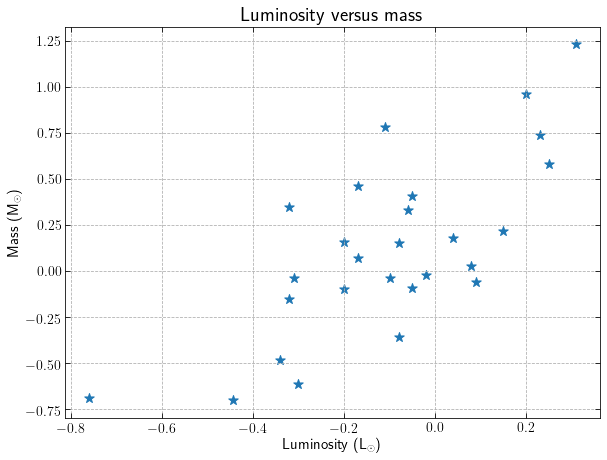

In [1]:
#import statements
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['text.usetex'] = True

#loading in data
info=pd.read_csv('/Users/annadignan/ursi2022/sources_info.csv',skiprows=[21, 22, 23])
info=pd.DataFrame(info)

T_eff_list=info['T_eff'].tolist()
unc_T_eff_list=info['uncertainty_Teff'].tolist()

#calculating un-logged uncertainty for temperature
for i,j in zip(T_eff_list,unc_T_eff_list):
    error=np.sqrt( (j)**2 / (1/(i*np.log(10)))**2)
    #print(error)

#plotting some stuff
plt.figure(figsize=(9.6,7.2))
plt.title('Luminosity versus mass',fontsize=20)
plt.xlabel(r'Luminosity (L$\textsubscript{\(\odot\)}$)',fontsize=15)
plt.ylabel(r'Mass (M$\textsubscript{\(\odot\)}$)',fontsize=15)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.tick_params(axis='both', direction='in', bottom=True, top=True, left=True, right=True,length=5)
plt.grid('on',linestyle='--')
plt.scatter(info['Log_Mstar'],info['log_Lstar'],s=100,marker='*')

# Error propagation

In [2]:
#import statement
import numpy as np

#calculating uncertainty in distance based on distance-parallax formula
def unc_dist(x,unc_x):
    return np.abs( (-1/(x)**2) * (unc_x))

#calculating uncertainty for TW Cha
print(unc_dist(5.399244102652735,0.019048464079153435)*1000)
#calculating uncertainty for VZ Cha
print(unc_dist(5.200052033325487,0.022361611106632352)*1000)

0.6534224295211416
0.8269661092643261


# Reading in Spitzer spectra

In [3]:
#installing packages needed for spec_utils
!pip install astroquery
!pip install molmass

In [4]:
#importing read_irs from spec_utils
from spec_utils import read_irs

#reading in spectra for different sources
irs1=read_irs('VZCHA',noerror=True,dd='/Users/annadignan/REDUCED/')
irs2=read_irs('AS205A',noerror=True,dd='/Users/annadignan/REDUCED/')
irs3=read_irs('DOAR25',noerror=True,dd='/Users/annadignan/REDUCED/')
irs4=read_irs('GKTAU',noerror=True,dd='/Users/annadignan/REDUCED/')

#making a table of spectrum data for VZ Cha
# from IPython.display import display
# import pandas as pd
# display(irs1)

File /Users/annadignan/REDUCED/AS205A_SH_final.fits not found


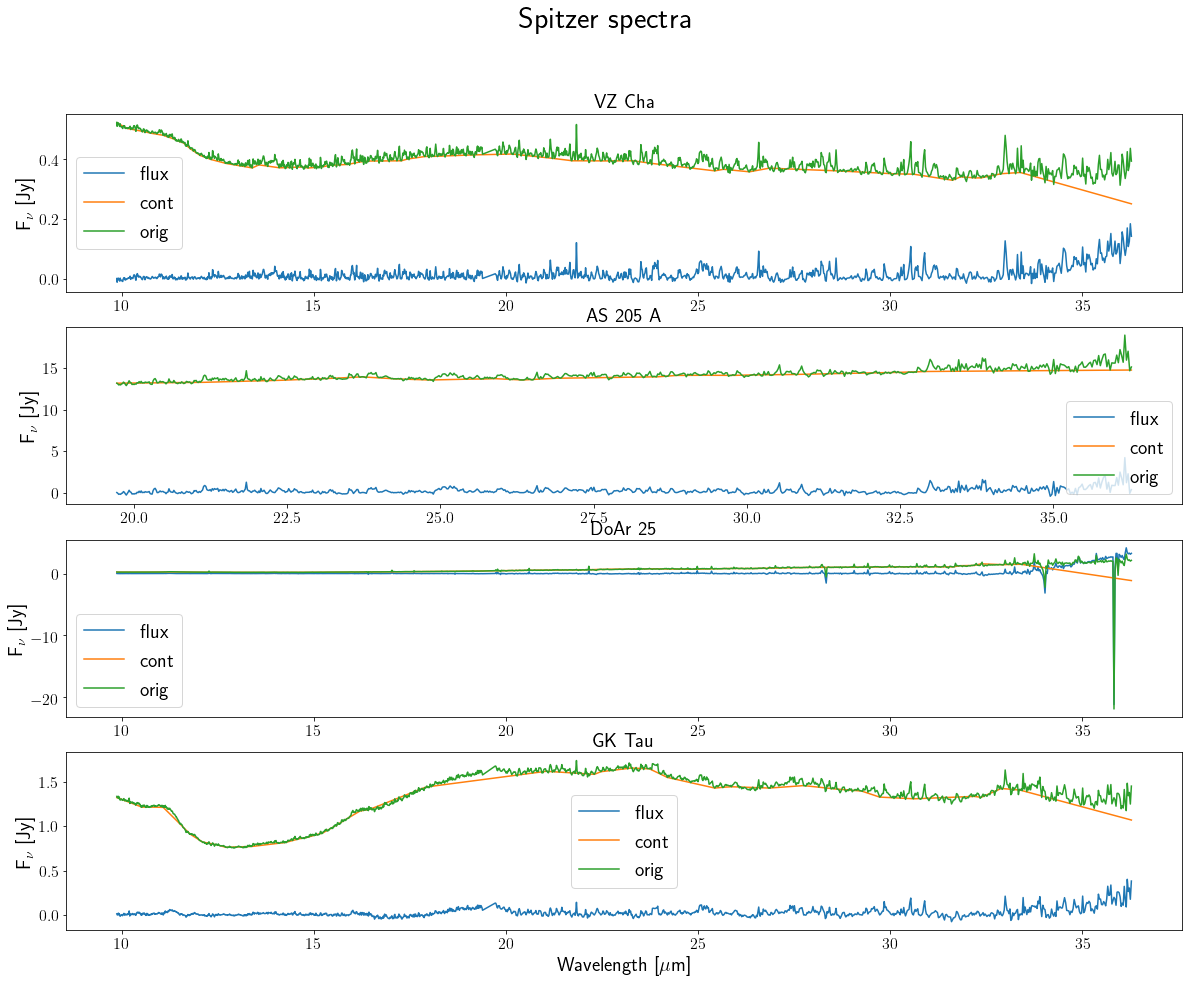

In [5]:
#setting up subplots
import matplotlib.pyplot as plt
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,figsize=(20,15))
fig.suptitle('Spitzer spectra',fontsize=30)

#plotting spectrum data for VZ Cha
ax1.plot(irs1.wave,irs1.flux,label='flux')
ax1.plot(irs1.wave,irs1.cont,label='cont')
ax1.plot(irs1.wave,irs1.orig,label='orig')
ax1.tick_params(labelsize=16)
ax1.set_title('VZ Cha',fontsize=20)
ax1.set_ylabel(r'F$_\nu$ [Jy]',fontsize=20)
#ax1.set_xlabel('Wavelength [$\mu$m]',fontsize=20)
ax1.legend(fontsize=20)

#plotting spectrum data for AS 205 A
ax2.plot(irs2.wave,irs2.flux,label='flux')
ax2.plot(irs2.wave,irs2.cont,label='cont')
ax2.plot(irs2.wave,irs2.orig,label='orig')
ax2.tick_params(labelsize=16)
ax2.set_title('AS 205 A',fontsize=20)
ax2.set_ylabel(r'F$_\nu$ [Jy]',fontsize=20)
#ax2.set_xlabel('Wavelength [$\mu$m]',fontsize=20)
ax2.legend(fontsize=20)

#plotting spectrum data for DoAr 25
ax3.plot(irs3.wave,irs3.flux,label='flux')
ax3.plot(irs3.wave,irs3.cont,label='cont')
ax3.plot(irs3.wave,irs3.orig,label='orig')
ax3.tick_params(labelsize=16)
ax3.set_title('DoAr 25',fontsize=20)
ax3.set_ylabel(r'F$_\nu$ [Jy]',fontsize=20)
#ax3.set_xlabel('Wavelength [$\mu$m]',fontsize=20)
ax3.legend(fontsize=20)

#plotting spectrum data for GK Tau
ax4.plot(irs4.wave,irs4.flux,label='flux')
ax4.plot(irs4.wave,irs4.cont,label='cont')
ax4.plot(irs4.wave,irs4.orig,label='orig')
ax4.tick_params(labelsize=16)
ax4.set_title('GK Tau',fontsize=20)
ax4.set_ylabel(r'F$_\nu$ [Jy]',fontsize=20)
ax4.set_xlabel('Wavelength [$\mu$m]',fontsize=20)
ax4.legend(fontsize=20)

# Flux fitting example

In [6]:
%pylab inline
from astropy.io import fits
import astropy.units as u
import pickle as pickle
import os as os
import pandas as pd

from spec_utils import read_irs

#!pip install spectools-ir

from spectools_ir.utils import extract_hitran_data, spec_convol, make_rotation_diagram, get_molmass
from spectools_ir.utils import compute_thermal_velocity, sigma_to_fwhm, fwhm_to_sigma, wn_to_k, spec_convol_R
from spectools_ir.utils import get_miri_mrs_resolution, get_miri_mrs_wavelengths, make_miri_mrs_figure

from spectools_ir.flux_calculator import calc_fluxes, make_lineshape

from spectools_ir.slabspec import make_spec

from spectools_ir.slab_fitter import Config, LineData,Retrieval
from spectools_ir.slab_fitter import corner_plot, trace_plot, find_best_fit, compute_model_fluxes
from spectools_ir.slab_fitter import calc_solid_angle, calc_radius
from spectools_ir.slab_fitter import read_data_from_file, get_samples

Populating the interactive namespace from numpy and matplotlib


/Users/annadignan/opt/anaconda3/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['info']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [7]:
irs=read_irs('GWLUP',dd='/Users/annadignan/REDUCED/',noerror=True)

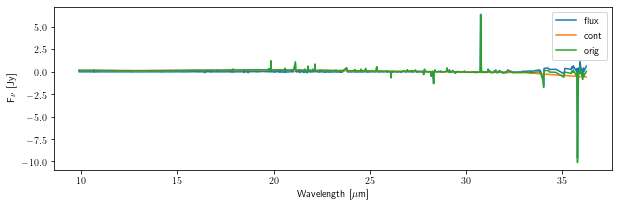

In [8]:
fig=plt.figure(figsize=(10,3))
ax1=fig.add_subplot(111)
ax1.plot(irs.wave,irs.flux,label='flux')
ax1.plot(irs.wave,irs.cont,label='cont')
ax1.plot(irs.wave,irs.orig,label='orig')
ax1.set_ylabel(r'F$_\nu$ [Jy]')
ax1.set_xlabel('Wavelength [$\mu$m]')
ax1.legend()

In [9]:
wave_data = pd.DataFrame([15.17], columns=['wave'])
print(wave_data)

    wave
0  15.17


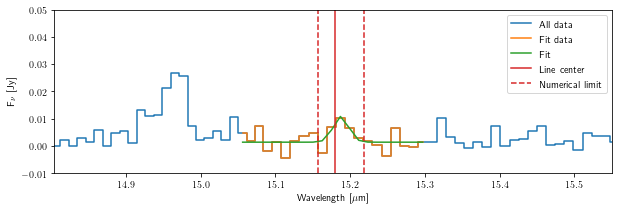

Is this fit okay? [y or n]y


In [10]:
lineflux_data=calc_fluxes(irs.wave,irs.flux,wave_data,v_dop=200,fwhm_v=500.,sep_v=2500.,cont=0,vet_fits=True, plot=True,ymax=0.05, ymin=-0.01,amp=0.02)

In [11]:
type(lineflux_data['lineflux'])

pandas.core.series.Series

# Calculating water line fluxes for Spitzer data

## DoAr 25

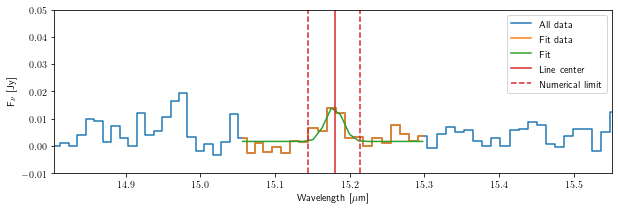

Is this fit okay? [y or n]y


,wave,lineflux,lineflux_Gaussian,lineflux_err,linewidth,linewidth_err,v_dop_fit,v_dop_fit_err,continuum,continuum_err
0,15.17,5.472261e-18,4.890249e-18,9.699192e-19,539.715751,136.885504,180.042999,55.150013,0.001605,0.000713


In [12]:
#DoAr 25 at 15.17 microns

irs1=read_irs('DOAR25',dd='/Users/annadignan/REDUCED/',noerror=True)
wave_data1=pd.DataFrame([15.17],columns=['wave'])
lineflux_data1=calc_fluxes(irs1.wave,irs1.flux,wave_data1,v_dop=200,fwhm_v=500.,sep_v=2500.,cont=0,vet_fits=True, plot=True,ymax=0.05, ymin=-0.01,amp=0.015)
lineflux_data1

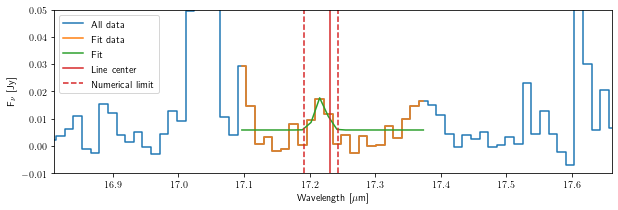

Is this fit okay? [y or n]y


,wave,lineflux,lineflux_Gaussian,lineflux_err,linewidth,linewidth_err,v_dop_fit,v_dop_fit_err,continuum,continuum_err
0,17.22,2.096050e-18,2.652094e-18,1.640146e-18,356.326643,287.56979,-51.092412,151.496278,0.005818,0.001911


In [13]:
#DoAr 25 at 17.22 microns

wave_data2=pd.DataFrame([17.22],columns=['wave'])
lineflux_data2=calc_fluxes(irs1.wave,irs1.flux,wave_data2,v_dop=200,fwhm_v=500.,sep_v=2500.,cont=0,vet_fits=True, plot=True,ymax=0.05, ymin=-0.01,amp=0.015)
lineflux_data2

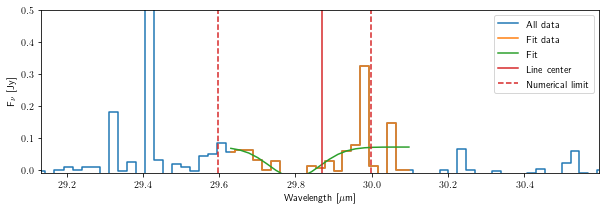

Is this fit okay? [y or n]y


,wave,lineflux,lineflux_Gaussian,lineflux_err,linewidth,linewidth_err,v_dop_fit,v_dop_fit_err,continuum,continuum_err
0,29.85,-3.746779e-17,5.405167e-17,3.813023e-17,1579.829607,1020.336409,-519.878962,330.164426,0.071091,0.029603


In [14]:
#DoAr 25 at 29.85 microns

wave_data3=pd.DataFrame([29.85],columns=['wave'])
lineflux_data3=calc_fluxes(irs3.wave,irs3.flux,wave_data3,v_dop=200,fwhm_v=500.,sep_v=2500.,cont=0,vet_fits=True, plot=True,ymax=0.5, ymin=-0.01,amp=0.2)
lineflux_data3

## FZ Tau

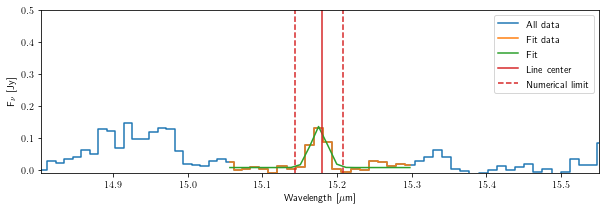

Is this fit okay? [y or n]y


,wave,lineflux,lineflux_Gaussian,lineflux_err,linewidth,linewidth_err,v_dop_fit,v_dop_fit_err,continuum,continuum_err
0,15.17,4.258356e-17,4.503385e-17,3.848713e-18,500.219007,54.015295,112.573576,22.991268,0.00698,0.003011


In [15]:
#FZ Tau at 15.17 microns

irs2=read_irs('FZTAU',dd='/Users/annadignan/REDUCED/',noerror=True)
wave_data4=pd.DataFrame([15.17],columns=['wave'])
lineflux_data4=calc_fluxes(irs2.wave,irs2.flux,wave_data4,v_dop=200,fwhm_v=500.,sep_v=2500.,cont=0,vet_fits=True, plot=True,ymax=0.5, ymin=-0.01,amp=0.015)
lineflux_data4

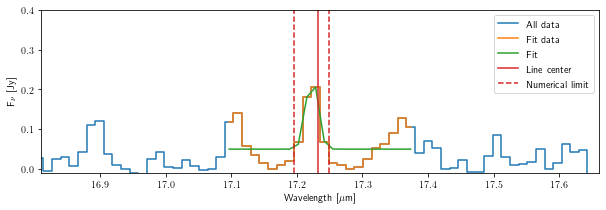

Is this fit okay? [y or n]y


,wave,lineflux,lineflux_Gaussian,lineflux_err,linewidth,linewidth_err,v_dop_fit,v_dop_fit_err,continuum,continuum_err
0,17.22,4.301957e-17,4.265453e-17,9.368311e-18,363.447713,169.77898,49.18637,46.190858,0.04997,0.010883


In [16]:
#FZ Tau at 17.22 microns

wave_data5=pd.DataFrame([17.22],columns=['wave'])
lineflux_data5=calc_fluxes(irs2.wave,irs2.flux,wave_data5,v_dop=200,fwhm_v=500.,sep_v=2500.,cont=0,vet_fits=True, plot=True,ymax=0.4, ymin=-0.01,amp=0.2)
lineflux_data5

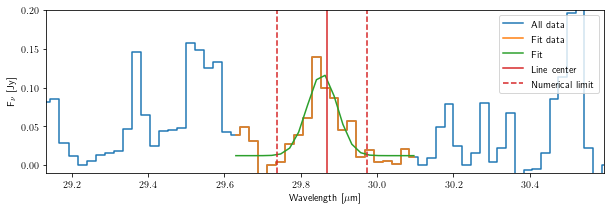

Is this fit okay? [y or n]y


,wave,lineflux,lineflux_Gaussian,lineflux_err,linewidth,linewidth_err,v_dop_fit,v_dop_fit_err,continuum,continuum_err
0,29.85,3.504484e-17,3.473303e-17,6.824646e-18,924.538835,184.453996,62.235366,70.437747,0.01231,0.006622


In [17]:
#FZ Tau at 29.85 microns

wave_data6=pd.DataFrame([29.85],columns=['wave'])
lineflux_data6=calc_fluxes(irs2.wave,irs2.flux,wave_data6,v_dop=200,fwhm_v=500.,sep_v=2500.,cont=0,vet_fits=True, plot=True,ymax=0.2, ymin=-0.01,amp=0.15)
lineflux_data6

## GK Tau

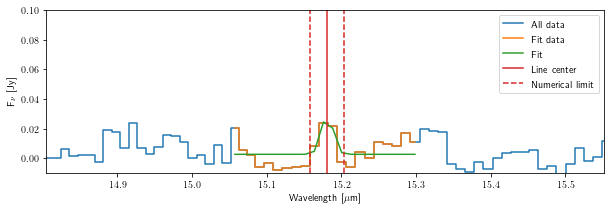

Is this fit okay? [y or n]y


,wave,lineflux,lineflux_Gaussian,lineflux_err,linewidth,linewidth_err,v_dop_fit,v_dop_fit_err,continuum,continuum_err
0,15.17,6.396186e-18,6.789533e-18,1.966933e-18,355.279555,274.690101,219.075547,63.145754,0.002598,0.002124


In [18]:
#GK Tau at 15.17 microns

irs3=read_irs('GKTAU',dd='/Users/annadignan/REDUCED/',noerror=True)
wave_data7=pd.DataFrame([15.17],columns=['wave'])
lineflux_data7=calc_fluxes(irs3.wave,irs3.flux,wave_data7,v_dop=200,fwhm_v=500.,sep_v=2500.,cont=0,vet_fits=True, plot=True,ymax=0.1, ymin=-0.01,amp=0.015)
lineflux_data7

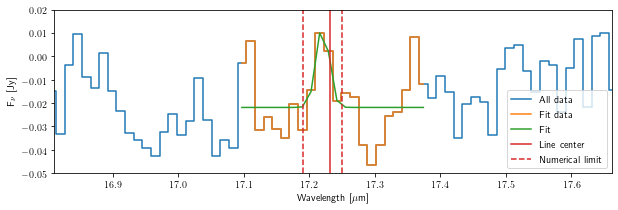

Is this fit okay? [y or n]y


,wave,lineflux,lineflux_Gaussian,lineflux_err,linewidth,linewidth_err,v_dop_fit,v_dop_fit_err,continuum,continuum_err
0,17.22,8.852483e-18,8.816691e-18,3.314711e-18,400.317898,241.207542,10.072981,86.396549,-0.021862,0.003503


In [19]:
#GK Tau at 17.22 microns

wave_data8=pd.DataFrame([17.22],columns=['wave'])
lineflux_data8=calc_fluxes(irs3.wave,irs3.flux,wave_data8,v_dop=200,fwhm_v=500.,sep_v=2500.,cont=0,vet_fits=True, plot=True,ymax=0.02, ymin=-0.05,amp=0.015)
lineflux_data8

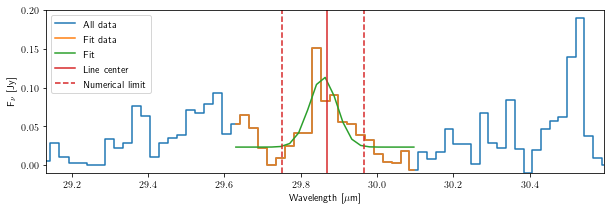

Is this fit okay? [y or n]y


,wave,lineflux,lineflux_Gaussian,lineflux_err,linewidth,linewidth_err,v_dop_fit,v_dop_fit_err,continuum,continuum_err
0,29.85,2.890340e-17,2.743444e-17,6.655476e-18,848.539545,215.292415,91.535389,83.270997,0.023346,0.006835


In [20]:
#GK Tau at 29.85 microns

irs3=read_irs('GKTAU',dd='/Users/annadignan/REDUCED/',noerror=True)
wave_data9=pd.DataFrame([29.85],columns=['wave'])
lineflux_data9=calc_fluxes(irs3.wave,irs3.flux,wave_data9,v_dop=200,fwhm_v=500.,sep_v=2500.,cont=0,vet_fits=True, plot=True,ymax=0.2, ymin=-0.01,amp=0.15)
lineflux_data9

## GQ Lup

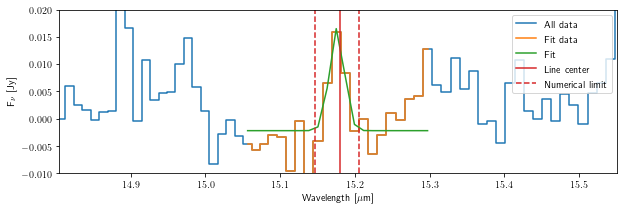

Is this fit okay? [y or n]y


,wave,lineflux,lineflux_Gaussian,lineflux_err,linewidth,linewidth_err,v_dop_fit,v_dop_fit_err,continuum,continuum_err
0,15.17,5.660965e-18,6.097621e-18,1.660060e-18,460.981527,159.219054,118.185905,71.044582,-0.002215,0.001392


In [21]:
#GQ Lup at 15.17 microns

irs4=read_irs('GQLUP',dd='/Users/annadignan/REDUCED/',noerror=True)
wave_data10=pd.DataFrame([15.17],columns=['wave'])
lineflux_data10=calc_fluxes(irs4.wave,irs4.flux,wave_data10,v_dop=200,fwhm_v=500.,sep_v=2500.,cont=0,vet_fits=True, plot=True,ymax=0.02, ymin=-0.01,amp=0.015)
lineflux_data10

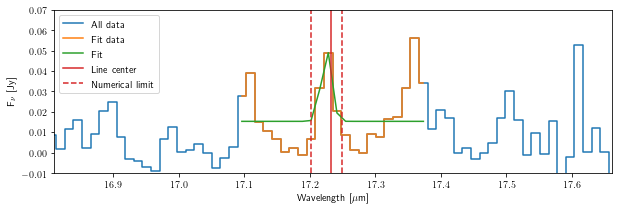

Is this fit okay? [y or n]y


,wave,lineflux,lineflux_Gaussian,lineflux_err,linewidth,linewidth_err,v_dop_fit,v_dop_fit_err,continuum,continuum_err
0,17.22,6.125589e-18,7.170070e-18,2.807495e-18,319.341159,230.735799,87.89615,103.114868,0.01533,0.00364


In [22]:
#GQ Lup at 17.22 microns

wave_data11=pd.DataFrame([17.22],columns=['wave'])
lineflux_data11=calc_fluxes(irs4.wave,irs4.flux,wave_data11,v_dop=200,fwhm_v=500.,sep_v=2500.,cont=0,vet_fits=True, plot=True,ymax=0.07, ymin=-0.01,amp=0.05)
lineflux_data11

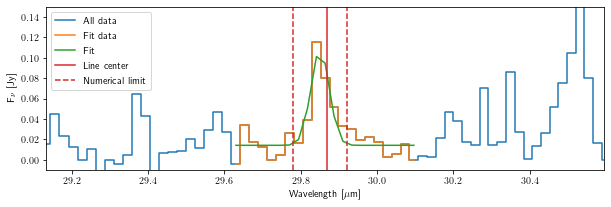

Is this fit okay? [y or n]y


,wave,lineflux,lineflux_Gaussian,lineflux_err,linewidth,linewidth_err,v_dop_fit,v_dop_fit_err,continuum,continuum_err
0,29.85,1.965452e-17,1.887873e-17,2.305292e-18,561.884999,84.739689,11.08636,34.182349,0.014204,0.003242


In [23]:
#GQ Lup at 29.85 microns

wave_data12=pd.DataFrame([29.85],columns=['wave'])
lineflux_data12=calc_fluxes(irs4.wave,irs4.flux,wave_data12,v_dop=200,fwhm_v=500.,sep_v=2500.,cont=0,vet_fits=True, plot=True,ymax=0.15, ymin=-0.01,amp=0.15)
lineflux_data12

## GW Lup

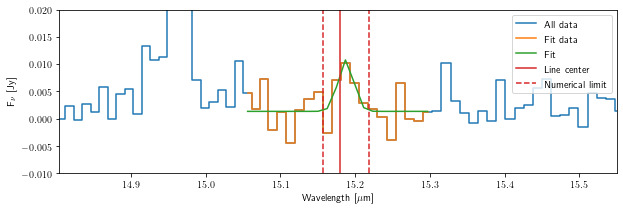

Is this fit okay? [y or n]y


,wave,lineflux,lineflux_Gaussian,lineflux_err,linewidth,linewidth_err,v_dop_fit,v_dop_fit_err,continuum,continuum_err
0,15.17,2.783484e-18,3.212450e-18,1.028144e-18,483.473611,195.623321,349.643987,85.106885,0.001335,0.000828


In [24]:
#GW Lup at 15.17 microns

irs5=read_irs('GWLUP',dd='/Users/annadignan/REDUCED/',noerror=True)
wave_data13=pd.DataFrame([15.17],columns=['wave'])
lineflux_data13=calc_fluxes(irs5.wave,irs5.flux,wave_data13,v_dop=200,fwhm_v=500.,sep_v=2500.,cont=0,vet_fits=True, plot=True,ymax=0.02, ymin=-0.01,amp=0.015)
lineflux_data13

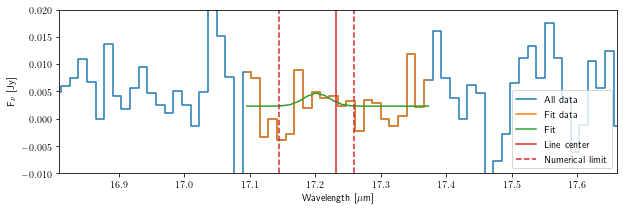

Is this fit okay? [y or n]y


,wave,lineflux,lineflux_Gaussian,lineflux_err,linewidth,linewidth_err,v_dop_fit,v_dop_fit_err,continuum,continuum_err
0,17.22,2.547517e-19,1.174482e-18,2.010357e-18,790.271779,1429.901154,-309.374646,558.003395,0.002301,0.001205


In [25]:
#GW Lup at 17.22 microns

wave_data14=pd.DataFrame([17.22],columns=['wave'])
lineflux_data14=calc_fluxes(irs5.wave,irs5.flux,wave_data14,v_dop=200,fwhm_v=500.,sep_v=2500.,cont=0,vet_fits=True, plot=True,ymax=0.02, ymin=-0.01,amp=0.005)
lineflux_data14

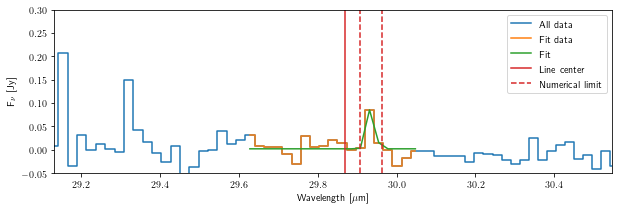

Is this fit okay? [y or n]y


,wave,lineflux,lineflux_Gaussian,lineflux_err,linewidth,linewidth_err,v_dop_fit,v_dop_fit_err,continuum,continuum_err
0,29.85,7.616102e-18,7.428323e-18,1.294869e-18,221.766118,303.674293,863.100181,193.20782,0.001869,0.004622


In [26]:
#GW Lup at 29.85 microns

wave_data15=pd.DataFrame([29.85],columns=['wave'])
lineflux_data15=calc_fluxes(irs5.wave,irs5.flux,wave_data15,v_dop=200,fwhm_v=500.,sep_v=2500.,cont=0,vet_fits=True, plot=True,ymax=0.3, ymin=-0.05,amp=0.08)
lineflux_data15

## IM Lup

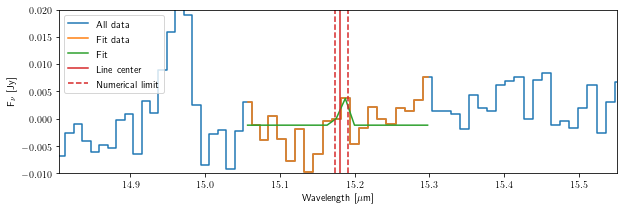

Is this fit okay? [y or n]y


,wave,lineflux,lineflux_Gaussian,lineflux_err,linewidth,linewidth_err,v_dop_fit,v_dop_fit_err,continuum,continuum_err
0,15.17,9.705994e-19,2.082246e-18,3.796980e-19,137.634004,2.429824e+07,247.142685,7.036059e+06,-0.001204,0.001032


In [27]:
#IM Lup at 15.17 microns

irs6=read_irs('IMLUP',dd='/Users/annadignan/REDUCED/',noerror=True)
wave_data16=pd.DataFrame([15.17],columns=['wave'])
lineflux_data16=calc_fluxes(irs6.wave,irs6.flux,wave_data16,v_dop=200,fwhm_v=500.,sep_v=2500.,cont=0,vet_fits=True, plot=True,ymax=0.02, ymin=-0.01,amp=0.005)
lineflux_data16

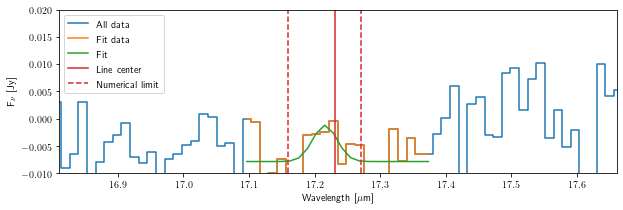

Is this fit okay? [y or n]y


,wave,lineflux,lineflux_Gaussian,lineflux_err,linewidth,linewidth_err,v_dop_fit,v_dop_fit_err,continuum,continuum_err
0,17.22,2.945565e-18,3.139050e-18,2.021128e-18,759.919806,524.687864,-74.478908,205.836673,-0.007893,0.001248


In [28]:
#IM Lup at 17.22 microns

wave_data17=pd.DataFrame([17.22],columns=['wave'])
lineflux_data17=calc_fluxes(irs6.wave,irs6.flux,wave_data17,v_dop=200,fwhm_v=500.,sep_v=2500.,cont=0,vet_fits=True, plot=True,ymax=0.02, ymin=-0.01,amp=0.005)
lineflux_data17

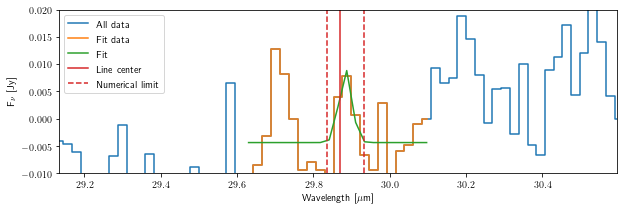

Is this fit okay? [y or n]y


,wave,lineflux,lineflux_Gaussian,lineflux_err,linewidth,linewidth_err,v_dop_fit,v_dop_fit_err,continuum,continuum_err
0,29.85,1.408061e-18,1.882787e-18,9.176271e-19,391.571759,248.760631,340.937066,120.383451,-0.004404,0.001759


In [29]:
#IM Lup at 29.85 microns

wave_data18=pd.DataFrame([29.85],columns=['wave'])
lineflux_data18=calc_fluxes(irs6.wave,irs6.flux,wave_data18,v_dop=200,fwhm_v=500.,sep_v=2500.,cont=0,vet_fits=True, plot=True,ymax=0.02, ymin=-0.01,amp=0.01)
lineflux_data18

## RU Lup

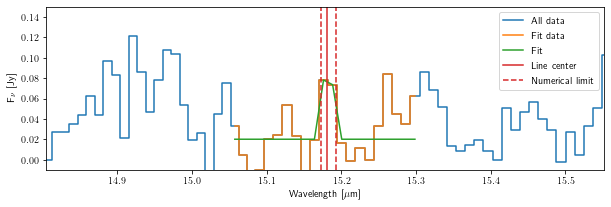

Is this fit okay? [y or n]y


,wave,lineflux,lineflux_Gaussian,lineflux_err,linewidth,linewidth_err,v_dop_fit,v_dop_fit_err,continuum,continuum_err
0,15.17,1.770461e-17,3.224098e-17,3.079305e-18,155.17446,1.401080e+06,239.606294,27039.204528,0.020165,0.007623


In [30]:
#RU Lup at 15.17 microns

irs7=read_irs('RULUP',dd='/Users/annadignan/REDUCED/',noerror=True)
wave_data19=pd.DataFrame([15.17],columns=['wave'])
lineflux_data19=calc_fluxes(irs7.wave,irs7.flux,wave_data19,v_dop=200,fwhm_v=500.,sep_v=2500.,cont=0,vet_fits=True, plot=True,ymax=0.15, ymin=-0.01,amp=0.08)
lineflux_data19

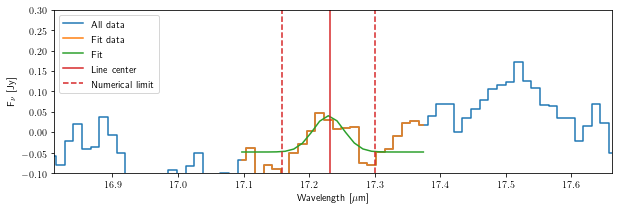

Is this fit okay? [y or n]y


,wave,lineflux,lineflux_Gaussian,lineflux_err,linewidth,linewidth_err,v_dop_fit,v_dop_fit_err,continuum,continuum_err
0,17.22,3.918501e-17,5.310880e-17,2.369110e-17,966.997872,423.892806,165.751982,160.916442,-0.048535,0.012411


In [31]:
#RU Lup at 17.22 microns

wave_data20=pd.DataFrame([17.22],columns=['wave'])
lineflux_data20=calc_fluxes(irs7.wave,irs7.flux,wave_data20,v_dop=200,fwhm_v=500.,sep_v=2500.,cont=0,vet_fits=True, plot=True,ymax=0.3, ymin=-0.1,amp=0.05)
lineflux_data20

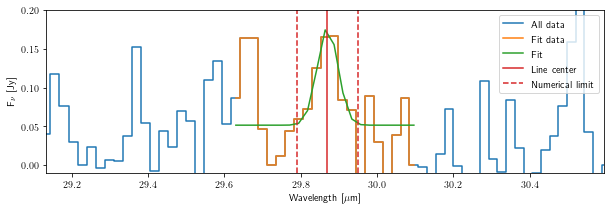

Is this fit okay? [y or n]y


,wave,lineflux,lineflux_Gaussian,lineflux_err,linewidth,linewidth_err,v_dop_fit,v_dop_fit_err,continuum,continuum_err
0,29.85,2.990565e-17,2.863773e-17,1.099522e-17,636.676387,287.109535,209.539685,113.657214,0.051567,0.013985


In [32]:
#RU Lup at 29.85 microns

wave_data21=pd.DataFrame([29.85],columns=['wave'])
lineflux_data21=calc_fluxes(irs7.wave,irs7.flux,wave_data21,v_dop=200,fwhm_v=500.,sep_v=2500.,cont=0,vet_fits=True, plot=True,ymax=0.2, ymin=-0.01,amp=0.01)
lineflux_data21

## RY Lup

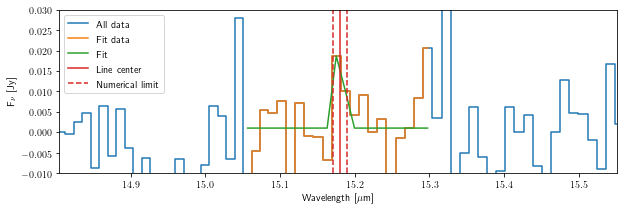

Is this fit okay? [y or n]y


,wave,lineflux,lineflux_Gaussian,lineflux_err,linewidth,linewidth_err,v_dop_fit,v_dop_fit_err,continuum,continuum_err
0,15.17,4.254385e-18,8.743247e-18,8.026868e-19,145.822468,4.606534e+06,214.778484,664441.071392,0.001011,0.002072


In [33]:
#RY Lup at 15.17 microns

irs8=read_irs('RYLUP',dd='/Users/annadignan/REDUCED/',noerror=True)
wave_data22=pd.DataFrame([15.17],columns=['wave'])
lineflux_data22=calc_fluxes(irs8.wave,irs8.flux,wave_data22,v_dop=200,fwhm_v=500.,sep_v=2500.,cont=0,vet_fits=True, plot=True,ymax=0.03, ymin=-0.01,amp=0.02)
lineflux_data22

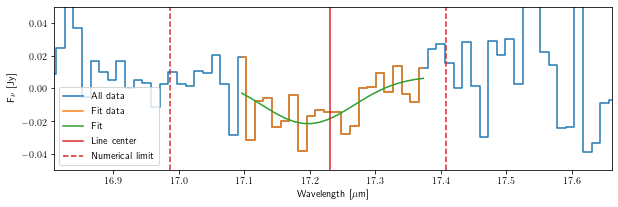

Is this fit okay? [y or n]y


,wave,lineflux,lineflux_Gaussian,lineflux_err,linewidth,linewidth_err,v_dop_fit,v_dop_fit_err,continuum,continuum_err
0,17.22,-4.851388e-17,5.202038e-17,2.048105e-17,2885.475394,1405.916157,-390.109537,266.386,0.007484,0.011596


In [34]:
#RY Lup at 17.22 microns

wave_data23=pd.DataFrame([17.22],columns=['wave'])
lineflux_data23=calc_fluxes(irs8.wave,irs8.flux,wave_data23,v_dop=200,fwhm_v=500.,sep_v=2500.,cont=0,vet_fits=True, plot=True,ymax=0.05, ymin=-0.05,amp=-0.01)
lineflux_data23

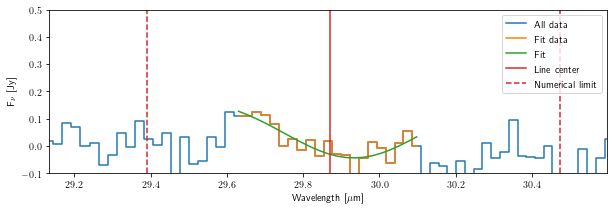

Is this fit okay? [y or n]y


,wave,lineflux,lineflux_Gaussian,lineflux_err,linewidth,linewidth_err,v_dop_fit,v_dop_fit_err,continuum,continuum_err
0,29.85,-2.742176e-16,3.444151e-16,4.891284e-17,4254.839654,1829.941697,831.808382,159.974273,0.183023,0.116499


In [35]:
#RY Lup at 29.85 microns

wave_data24=pd.DataFrame([29.85],columns=['wave'])
lineflux_data24=calc_fluxes(irs8.wave,irs8.flux,wave_data24,v_dop=200,fwhm_v=500.,sep_v=2500.,cont=0,vet_fits=True, plot=True,ymax=0.5, ymin=-0.1,amp=0.02)
lineflux_data24

## TW Cha

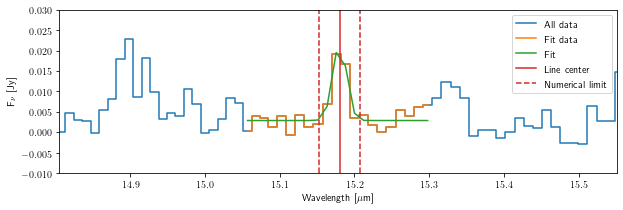

Is this fit okay? [y or n]y


,wave,lineflux,lineflux_Gaussian,lineflux_err,linewidth,linewidth_err,v_dop_fit,v_dop_fit_err,continuum,continuum_err
0,15.17,5.566965e-18,5.646096e-18,5.747262e-19,425.050083,71.121896,201.981471,24.631049,0.002868,0.000523


In [36]:
#TW Cha at 15.17 microns

irs9=read_irs('TWCHA',dd='/Users/annadignan/REDUCED/',noerror=True)
wave_data25=pd.DataFrame([15.17],columns=['wave'])
lineflux_data25=calc_fluxes(irs9.wave,irs9.flux,wave_data25,v_dop=200,fwhm_v=500.,sep_v=2500.,cont=0,vet_fits=True, plot=True,ymax=0.03, ymin=-0.01,amp=0.02)
lineflux_data25

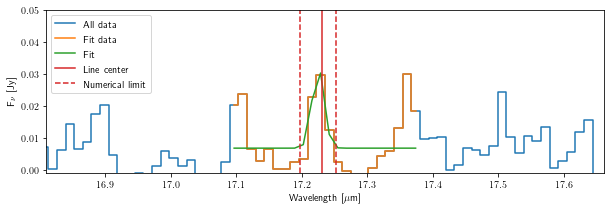

Is this fit okay? [y or n]y


,wave,lineflux,lineflux_Gaussian,lineflux_err,linewidth,linewidth_err,v_dop_fit,v_dop_fit_err,continuum,continuum_err
0,17.22,5.480698e-18,5.853553e-18,2.072959e-18,368.674247,216.878179,86.866104,82.022539,0.006765,0.002356


In [37]:
#TW Cha at 17.22 microns

wave_data26=pd.DataFrame([17.22],columns=['wave'])
lineflux_data26=calc_fluxes(irs9.wave,irs9.flux,wave_data26,v_dop=200,fwhm_v=500.,sep_v=2500.,cont=0,vet_fits=True, plot=True,ymax=0.05, ymin=-0.001,amp=0.03)
lineflux_data26

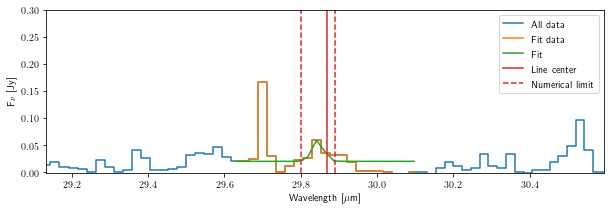

Is this fit okay? [y or n]y


,wave,lineflux,lineflux_Gaussian,lineflux_err,linewidth,linewidth_err,v_dop_fit,v_dop_fit_err,continuum,continuum_err
0,29.85,5.743967e-18,4.945738e-18,4.354315e-18,349.003824,444.261408,-49.416936,220.459668,0.020522,0.009269


In [38]:
#TW Cha at 29.85 microns

wave_data27=pd.DataFrame([29.85],columns=['wave'])
lineflux_data27=calc_fluxes(irs9.wave,irs9.flux,wave_data27,v_dop=200,fwhm_v=500.,sep_v=2500.,cont=0,vet_fits=True, plot=True,ymax=0.3, ymin=-0.001,amp=0.05)
lineflux_data27

## VZ Cha

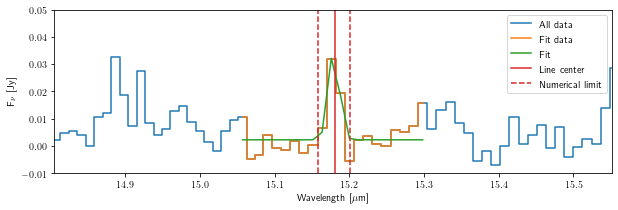

Is this fit okay? [y or n]y


,wave,lineflux,lineflux_Gaussian,lineflux_err,linewidth,linewidth_err,v_dop_fit,v_dop_fit_err,continuum,continuum_err
0,15.17,6.868807e-18,7.921626e-18,1.159080e-18,330.962662,116.205403,186.307756,40.666438,0.002205,0.001324


In [39]:
#VZ Cha at 15.17 microns

irs10=read_irs('VZCHA',dd='/Users/annadignan/REDUCED/',noerror=True)
wave_data28=pd.DataFrame([15.17],columns=['wave'])
lineflux_data28=calc_fluxes(irs10.wave,irs10.flux,wave_data28,v_dop=200,fwhm_v=500.,sep_v=2500.,cont=0,vet_fits=True, plot=True,ymax=0.05, ymin=-0.01,amp=0.03)
lineflux_data28

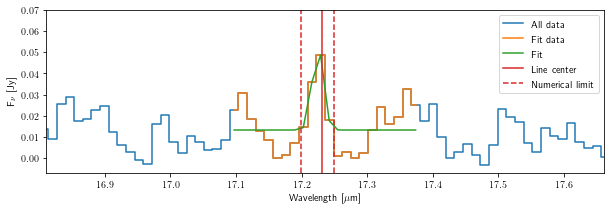

Is this fit okay? [y or n]y


,wave,lineflux,lineflux_Gaussian,lineflux_err,linewidth,linewidth_err,v_dop_fit,v_dop_fit_err,continuum,continuum_err
0,17.22,8.549660e-18,8.499198e-18,2.017547e-18,339.747395,169.3496,81.968844,55.160903,0.013283,0.00248


In [40]:
#VZ Cha at 17.22 microns

wave_data29=pd.DataFrame([17.22],columns=['wave'])
lineflux_data29=calc_fluxes(irs10.wave,irs10.flux,wave_data29,v_dop=200,fwhm_v=500.,sep_v=2500.,cont=0,vet_fits=True, plot=True,ymax=0.07, ymin=-0.007,amp=0.05)
lineflux_data29

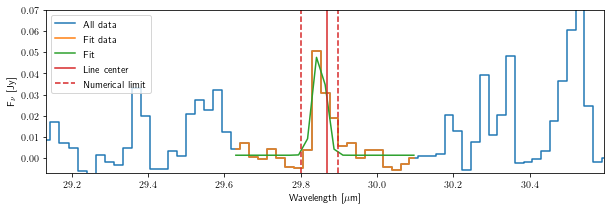

Is this fit okay? [y or n]y


,wave,lineflux,lineflux_Gaussian,lineflux_err,linewidth,linewidth_err,v_dop_fit,v_dop_fit_err,continuum,continuum_err
0,29.85,7.684464e-18,6.968504e-18,6.919478e-19,376.956507,67.200676,-6.645537,22.803223,0.001385,0.001384


In [41]:
#VZ Cha at 29.85 microns

wave_data30=pd.DataFrame([29.85],columns=['wave'])
lineflux_data30=calc_fluxes(irs10.wave,irs10.flux,wave_data30,v_dop=200,fwhm_v=500.,sep_v=2500.,cont=0,vet_fits=True, plot=True,ymax=0.07, ymin=-0.007,amp=0.1)
lineflux_data30

## WaOph 6

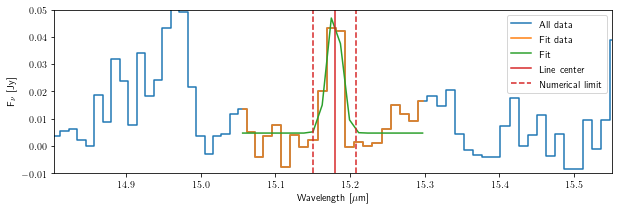

Is this fit okay? [y or n]y


,wave,lineflux,lineflux_Gaussian,lineflux_err,linewidth,linewidth_err,v_dop_fit,v_dop_fit_err,continuum,continuum_err
0,15.17,1.374424e-17,1.444772e-17,2.000988e-18,439.909925,92.990772,180.952998,34.37773,0.004686,0.001762


In [42]:
#WaOph 6 at 15.17 microns

irs11=read_irs('WAOPH6',dd='/Users/annadignan/REDUCED/',noerror=True)
wave_data31=pd.DataFrame([15.17],columns=['wave'])
lineflux_data31=calc_fluxes(irs11.wave,irs11.flux,wave_data31,v_dop=200,fwhm_v=500.,sep_v=2500.,cont=0,vet_fits=True, plot=True,ymax=0.05, ymin=-0.01,amp=0.04)
lineflux_data31

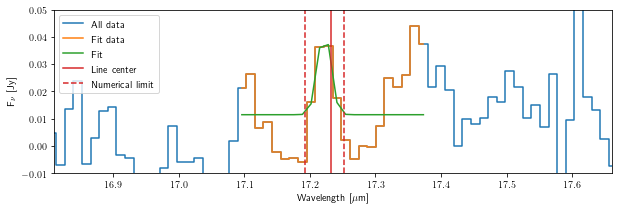

Is this fit okay? [y or n]y


,wave,lineflux,lineflux_Gaussian,lineflux_err,linewidth,linewidth_err,v_dop_fit,v_dop_fit_err,continuum,continuum_err
0,17.22,8.099548e-18,7.885153e-18,3.476697e-18,404.16463,306.04105,30.165303,98.901118,0.011442,0.003657


In [43]:
#WaOph 6 at 17.22 microns

wave_data32=pd.DataFrame([17.22],columns=['wave'])
lineflux_data32=calc_fluxes(irs11.wave,irs11.flux,wave_data32,v_dop=200,fwhm_v=500.,sep_v=2500.,cont=0,vet_fits=True, plot=True,ymax=0.05, ymin=-0.01,amp=0.04)
lineflux_data32

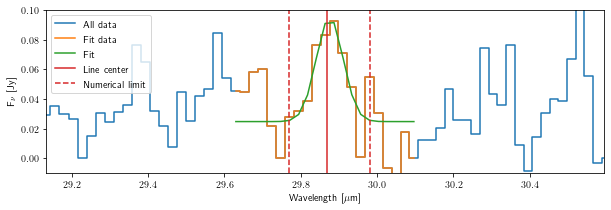

Is this fit okay? [y or n]y


,wave,lineflux,lineflux_Gaussian,lineflux_err,linewidth,linewidth_err,v_dop_fit,v_dop_fit_err,continuum,continuum_err
0,29.85,2.172941e-17,2.079892e-17,6.009596e-18,831.347497,253.817228,259.201955,97.859703,0.024672,0.006265


In [44]:
#WaOph 6 at 29.85 microns

wave_data33=pd.DataFrame([29.85],columns=['wave'])
lineflux_data33=calc_fluxes(irs11.wave,irs11.flux,wave_data33,v_dop=200,fwhm_v=500.,sep_v=2500.,cont=0,vet_fits=True, plot=True,ymax=0.1, ymin=-0.01,amp=0.08)
lineflux_data33

## AS 205

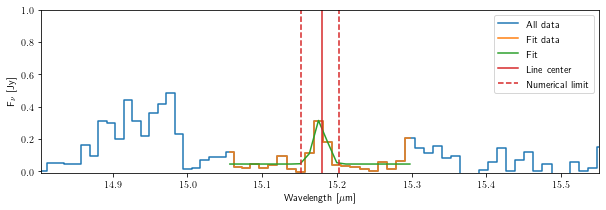

Is this fit okay? [y or n]y


,wave,lineflux,lineflux_Gaussian,lineflux_err,linewidth,linewidth_err,v_dop_fit,v_dop_fit_err,continuum,continuum_err
0,15.17,7.483349e-17,7.653978e-17,1.263545e-17,391.072217,88.991393,149.841577,41.955659,0.045411,0.01228


In [45]:
#AS 205 at 15.17 microns

irs12=read_irs('AS205_c2d',dd='/Users/annadignan/REDUCED/',noerror=True)
wave_data34=pd.DataFrame([15.17],columns=['wave'])
lineflux_data34=calc_fluxes(irs12.wave,irs12.flux,wave_data34,v_dop=200,fwhm_v=500.,sep_v=2500.,cont=0,vet_fits=True, plot=True,ymax=1, ymin=-0.01,amp=0.8)
lineflux_data34

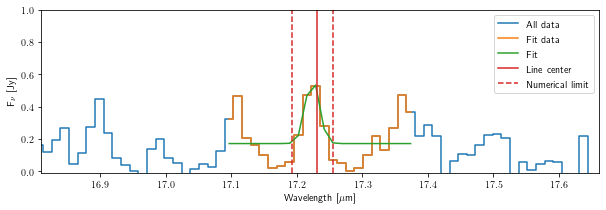

Is this fit okay? [y or n]y


,wave,lineflux,lineflux_Gaussian,lineflux_err,linewidth,linewidth_err,v_dop_fit,v_dop_fit_err,continuum,continuum_err
0,17.22,1.092840e-16,1.072476e-16,3.567227e-17,427.781811,214.632181,62.406042,78.75478,0.172212,0.035522


In [46]:
#AS 205 at 17.22 microns

wave_data35=pd.DataFrame([17.22],columns=['wave'])
lineflux_data35=calc_fluxes(irs12.wave,irs12.flux,wave_data35,v_dop=200,fwhm_v=500.,sep_v=2500.,cont=0,vet_fits=True, plot=True,ymax=1, ymin=-0.01,amp=0.8)
lineflux_data35

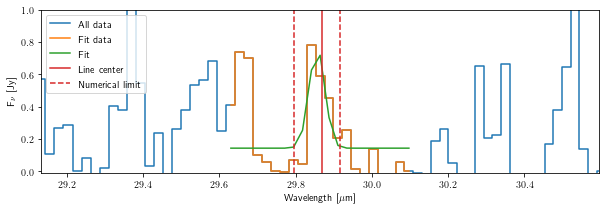

Is this fit okay? [y or n]y


,wave,lineflux,lineflux_Gaussian,lineflux_err,linewidth,linewidth_err,v_dop_fit,v_dop_fit_err,continuum,continuum_err
0,29.85,1.056089e-16,1.071762e-16,3.912279e-17,482.076968,238.043869,63.430932,94.242823,0.143698,0.062718


In [47]:
#AS 205 A at 29.85 microns

wave_data36=pd.DataFrame([29.85],columns=['wave'])
lineflux_data36=calc_fluxes(irs12.wave,irs12.flux,wave_data36,v_dop=200,fwhm_v=500.,sep_v=2500.,cont=0,vet_fits=True, plot=True,ymax=1, ymin=-0.01,amp=0.8)
lineflux_data36

## IQ Tau

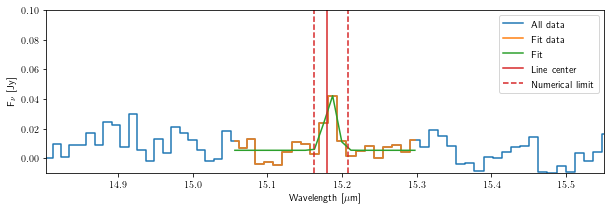

Is this fit okay? [y or n]y


,wave,lineflux,lineflux_Gaussian,lineflux_err,linewidth,linewidth_err,v_dop_fit,v_dop_fit_err,continuum,continuum_err
0,15.17,9.289795e-18,9.720622e-18,1.250663e-18,354.107505,75.350465,292.79863,34.022559,0.005295,0.001335


In [56]:
#IQ Tau at 15.17 microns

irs13=read_irs('IQTAU',dd='/Users/annadignan/REDUCED/',noerror=True)
wave_data37=pd.DataFrame([15.17],columns=['wave'])
lineflux_data37=calc_fluxes(irs13.wave,irs13.flux,wave_data37,v_dop=200,fwhm_v=500.,sep_v=2500.,cont=0,vet_fits=True, plot=True,ymax=0.1, ymin=-0.01,amp=0.04)
lineflux_data37

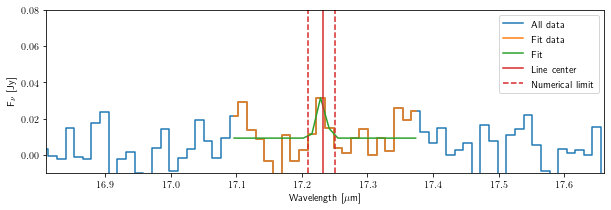

Is this fit okay? [y or n]y


,wave,lineflux,lineflux_Gaussian,lineflux_err,linewidth,linewidth_err,v_dop_fit,v_dop_fit_err,continuum,continuum_err
0,17.22,4.002685e-18,3.951217e-18,1.783515e-18,280.563911,216.0176,172.374809,145.218414,0.009241,0.002614


In [58]:
#IQ Tau at 17.22 microns

wave_data38=pd.DataFrame([17.22],columns=['wave'])
lineflux_data38=calc_fluxes(irs13.wave,irs13.flux,wave_data38,v_dop=200,fwhm_v=500.,sep_v=2500.,cont=0,vet_fits=True, plot=True,ymax=0.08, ymin=-0.01,amp=0.03)
lineflux_data38

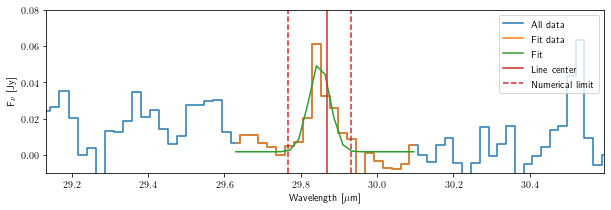

Is this fit okay? [y or n]y


,wave,lineflux,lineflux_Gaussian,lineflux_err,linewidth,linewidth_err,v_dop_fit,v_dop_fit_err,continuum,continuum_err
0,29.85,1.190869e-17,1.137997e-17,1.715925e-18,645.724908,112.984745,-12.277791,45.225964,0.001708,0.002156


In [61]:
#IQ Tau at 29.85 microns

wave_data39=pd.DataFrame([29.85],columns=['wave'])
lineflux_data39=calc_fluxes(irs13.wave,irs13.flux,wave_data39,v_dop=200,fwhm_v=500.,sep_v=2500.,cont=0,vet_fits=True, plot=True,ymax=0.08, ymin=-0.01,amp=0.1)
lineflux_data39

## HT Lup

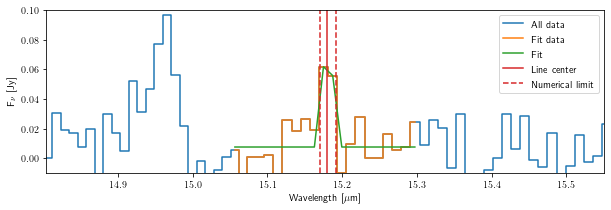

Is this fit okay? [y or n]y


,wave,lineflux,lineflux_Gaussian,lineflux_err,linewidth,linewidth_err,v_dop_fit,v_dop_fit_err,continuum,continuum_err
0,15.17,1.637168e-17,2.877350e-17,1.455377e-18,158.860855,465769.097643,218.166202,12791.612654,0.007516,0.003516


In [63]:
#HT Lup at 15.17 microns

irs14=read_irs('HTLUP',dd='/Users/annadignan/REDUCED/',noerror=True)
wave_data40=pd.DataFrame([15.17],columns=['wave'])
lineflux_data40=calc_fluxes(irs14.wave,irs14.flux,wave_data40,v_dop=200,fwhm_v=500.,sep_v=2500.,cont=0,vet_fits=True, plot=True,ymax=0.1, ymin=-0.01,amp=0.06)
lineflux_data40

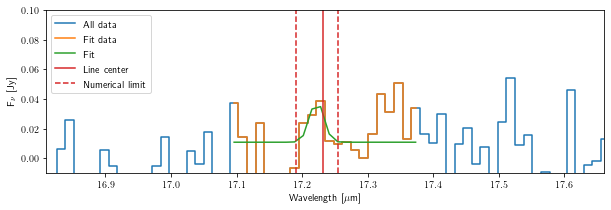

Is this fit okay? [y or n]y


,wave,lineflux,lineflux_Gaussian,lineflux_err,linewidth,linewidth_err,v_dop_fit,v_dop_fit_err,continuum,continuum_err
0,17.22,7.934568e-18,7.584332e-18,5.706657e-18,436.361234,495.972481,38.385259,179.210575,0.010756,0.005589


In [65]:
#HT Lup at 17.22 microns

wave_data41=pd.DataFrame([17.22],columns=['wave'])
lineflux_data41=calc_fluxes(irs14.wave,irs14.flux,wave_data41,v_dop=200,fwhm_v=500.,sep_v=2500.,cont=0,vet_fits=True, plot=True,ymax=0.1, ymin=-0.01,amp=0.04)
lineflux_data41

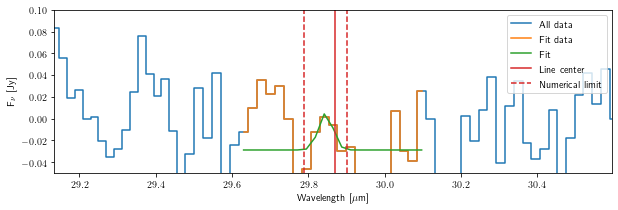

Is this fit okay? [y or n]y


,wave,lineflux,lineflux_Gaussian,lineflux_err,linewidth,linewidth_err,v_dop_fit,v_dop_fit_err,continuum,continuum_err
0,29.85,4.035469e-18,5.345085e-18,7.828514e-18,442.306267,854.196035,-46.590052,366.332141,-0.028847,0.013466


In [68]:
#HT Lup at 29.85 microns

wave_data42=pd.DataFrame([29.85],columns=['wave'])
lineflux_data42=calc_fluxes(irs14.wave,irs14.flux,wave_data42,v_dop=200,fwhm_v=500.,sep_v=2500.,cont=0,vet_fits=True, plot=True,ymax=0.1, ymin=-0.05,amp=0.01)
lineflux_data42

# Plotting calculated water line fluxes

In [71]:
#calculated line fluxes for 15.17 microns
results1=[list(lineflux_data1['lineflux'])[0],list(lineflux_data4['lineflux'])[0],list(lineflux_data7['lineflux'])[0]]

#calculated line fluxes for 17.22 microns
results2=[list(lineflux_data2['lineflux'])[0],list(lineflux_data5['lineflux'])[0]list(lineflux_data8['lineflux'])[0]]

#calculated line fluxes for 29.85 microns
results3=[list(lineflux_data3['lineflux'])[0],list(lineflux_data6['lineflux'])[0]list(lineflux_data9['lineflux'])[0]]

#line fluxes for 15.17 microns from paper
values1=[]

#line fluxes for 17.22 microns from paper
values2=[]

#line fluxes for 29.85 microns from paper
values3=[]

[2.1729399055331326e-17]


## Automating line flux calculation

In [48]:
###using a for loop to calculate water line fluxes for our sources

#removed 3 problematic sources from list
#removed: HT Lup, IQ Tau, AS205 A
sources=['DOAR25','FZTAU','GKTAU','GQLUP','GWLUP','IMLUP','RULUP','RYLUP','TWCHA','VZCHA','WAOPH6']

#making a separate list of sources with nicer-looking formatting for final dataframe
sources_formatted=['DoAr 25','FZ Tau','GK Tau','GQ Lup','GW Lup','IM Lup','RU Lup','RY Lup','TW Cha','VZ Cha','WaOph 6']

#initialize empty lists
linefluxes1=[]
linefluxes2=[]
linefluxes3=[]

#here's the meat and potatoes
for s in sources:
    
    #read in data
    irs=read_irs(src_name=s,dd='/Users/annadignan/REDUCED/',noerror=True)
    
    #calculating line fluxes for 15.17 microns
    wave_data1 = pd.DataFrame([15.17], columns=['wave'])
    lineflux_data1=calc_fluxes(irs.wave,irs.flux,wave_data1,v_dop=200,fwhm_v=500.,sep_v=2500.,cont=0,vet_fits=False, plot=False,ymax=0.05, ymin=-0.01,amp=0.02)
    #appending results to list
    linefluxes1.append(list(lineflux_data1['lineflux'])[0])
    
    #repeating above process for 17.22 microns
    wave_data2 = pd.DataFrame([17.22], columns=['wave'])
    lineflux_data2=calc_fluxes(irs.wave,irs.flux,wave_data2,v_dop=200,fwhm_v=500.,sep_v=2500.,cont=0,vet_fits=False, plot=False,ymax=0.05, ymin=-0.01,amp=0.02)
    linefluxes2.append(list(lineflux_data2['lineflux'])[0])
                       
    #ditto but for 29.85 microns
    wave_data3 = pd.DataFrame([29.85], columns=['wave'])
    lineflux_data3=calc_fluxes(irs.wave,irs.flux,wave_data3,v_dop=200,fwhm_v=500.,sep_v=2500.,cont=0,vet_fits=False, plot=False,ymax=0.05, ymin=-0.01,amp=0.02)
    linefluxes3.append(list(lineflux_data3['lineflux'])[0])
                       
#creating a dataframe with results
results=pd.DataFrame(list(zip(linefluxes1,linefluxes2,linefluxes3)), index=sources_formatted, columns=['15.17 microns','17.22 microns','29.85 microns'])
results

/Users/annadignan/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/annadignan/opt/anaconda3/lib/python3.8/site-packages/spectools_ir/flux_calculator/helpers.py:188: RuntimeWarning: Mean of empty slice
  dwave=np.nanmean(np.diff(myx[mybool]))


,15.17 microns,17.22 microns,29.85 microns
DoAr 25,5.472248e-18,2.095959e-18,-3.747386e-17
FZ Tau,4.258354e-17,0.000000e+00,3.504442e-17
GK Tau,6.396287e-18,8.852458e-18,2.890336e-17
GQ Lup,5.660968e-18,6.125578e-18,1.965451e-17
GW Lup,2.783486e-18,2.547260e-19,7.616102e-18
IM Lup,9.705963e-19,2.945558e-18,1.408070e-18
RU Lup,1.770461e-17,3.918422e-17,2.990551e-17
RY Lup,4.254385e-18,-4.850722e-17,-2.742176e-16
TW Cha,5.566965e-18,5.480712e-18,5.743879e-18
VZ Cha,6.868810e-18,8.549667e-18,7.684449e-18


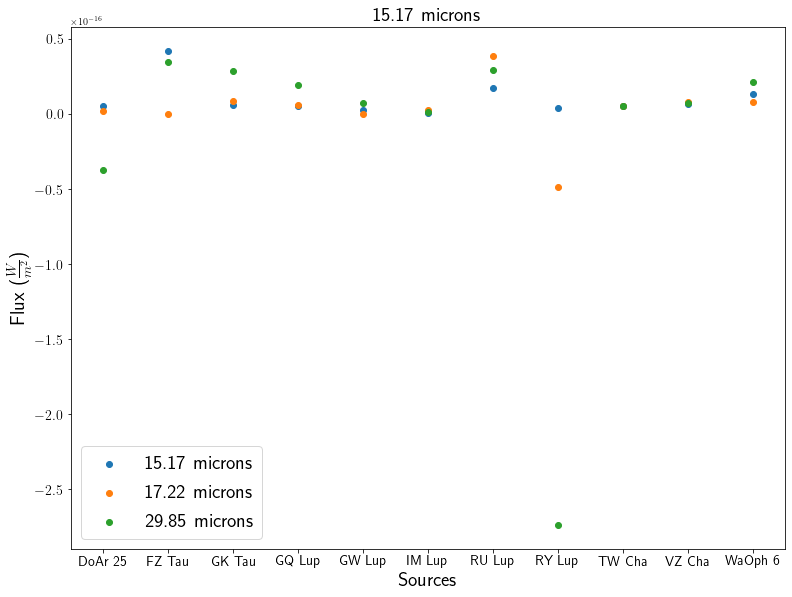

In [49]:
#plotting calculated line fluxes for all three wavelengths

plt.figure(figsize=(12.8,9.6))
plt.scatter(x=results.index,y=results['15.17 microns'],label='15.17 microns')
plt.scatter(x=results.index,y=results['17.22 microns'],label='17.22 microns')
plt.scatter(x=results.index,y=results['29.85 microns'],label='29.85 microns')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.title('15.17 microns',fontsize=20)
plt.xlabel('Sources',fontsize=20)
plt.ylabel(r'Flux ($\frac{W}{m^{2}}$)',fontsize=20)
plt.legend(fontsize=20)

Text(0, 0.5, 'Flux ($\\frac{W}{m^{2}}$)')

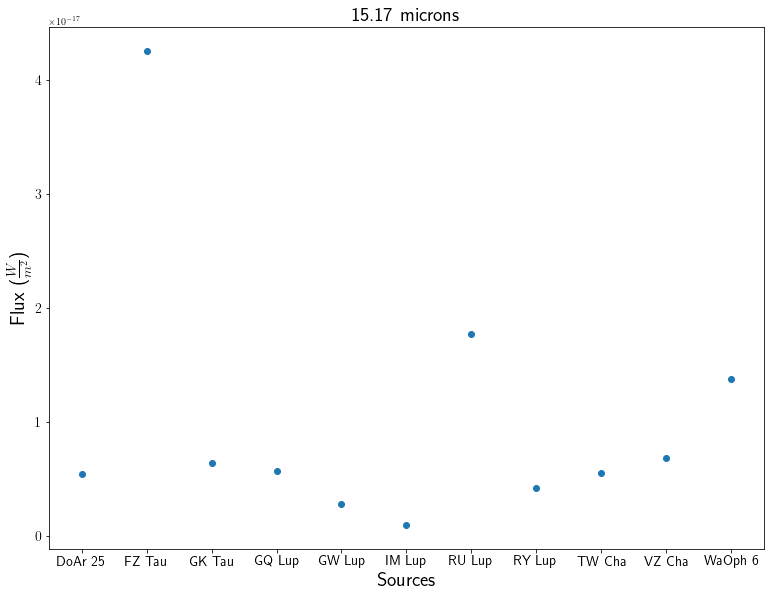

In [50]:
#plotting calculated line fluxes for 15.17 microns

plt.figure(figsize=(12.8,9.6))
plt.scatter(x=results.index,y=results['15.17 microns'])
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.title('15.17 microns',fontsize=20)
plt.xlabel('Sources',fontsize=20)
plt.ylabel(r'Flux ($\frac{W}{m^{2}}$)',fontsize=20)

Text(0, 0.5, 'Flux ($\\frac{W}{m^{2}}$)')

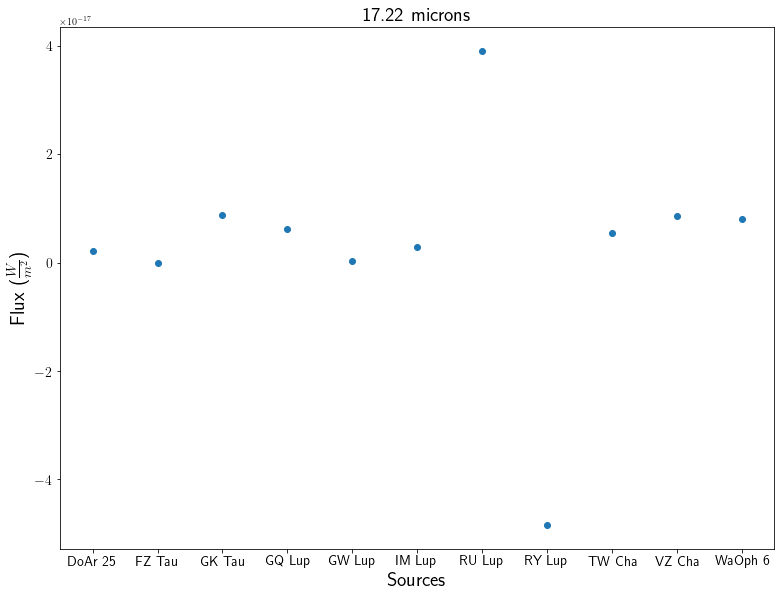

In [51]:
#plotting calculated line fluxes for 17.22 microns

plt.figure(figsize=(12.8,9.6))
plt.scatter(x=results.index,y=results['17.22 microns'])
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.title('17.22 microns',fontsize=20)
plt.xlabel('Sources',fontsize=20)
plt.ylabel(r'Flux ($\frac{W}{m^{2}}$)',fontsize=20)

Text(0, 0.5, 'Flux ($\\frac{W}{m^{2}}$)')

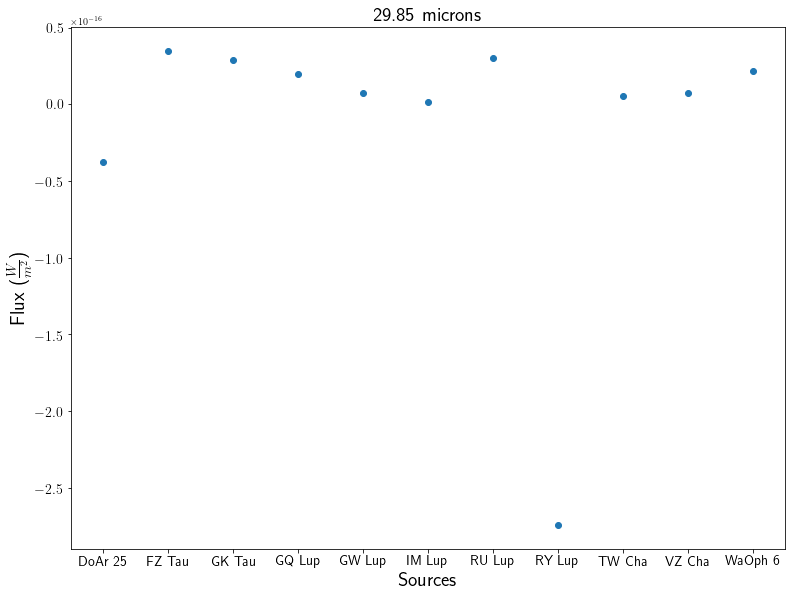

In [52]:
#plotting calculated line fluxes for 29.85 microns

plt.figure(figsize=(12.8,9.6))
plt.scatter(x=results.index,y=results['29.85 microns'])
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.title('29.85 microns',fontsize=20)
plt.xlabel('Sources',fontsize=20)
plt.ylabel(r'Flux ($\frac{W}{m^{2}}$)',fontsize=20)

In [53]:
###investigating three problematic sources

irs_bad=read_irs('IQTAU',dd='/Users/annadignan/REDUCED/',noerror=True)
wave_data_bad = pd.DataFrame([29.85], columns=['wave'])
print(wave_data_bad)
lineflux_data_bad=calc_fluxes(irs_bad.wave,irs_bad.flux,wave_data_bad,v_dop=200,fwhm_v=500.,sep_v=2500.,cont=0,vet_fits=False, plot=False,ymax=0.05, ymin=-0.01,amp=0.02)
lineflux_data_bad

    wave
0  29.85


,wave,lineflux,lineflux_Gaussian,lineflux_err,linewidth,linewidth_err,v_dop_fit,v_dop_fit_err,continuum,continuum_err
0,29.85,1.190870e-17,1.137998e-17,1.715928e-18,645.726043,112.985057,-12.277522,45.226078,0.001708,0.002156
